# ASDS 5305 - Final Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.font_manager as fm

path_to_public_sans = fm.findfont('Public Sans')
public_sans = fm.FontProperties(fname=path_to_public_sans)

sns.set_style("whitegrid")
plt.rcParams['font.family'] = public_sans.get_name()  # Register the font by its internal name
plt.rcParams['font.size'] = 12

# set figure size to 14, 6 in rcparams
plt.rcParams['figure.figsize'] = 14, 6
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.facecolor'] = '#f7f6f2'
plt.rcParams['axes.facecolor'] = '#f7f6f2'
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.alpha'] = 0.55
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["#095859"])

# xtick text size
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [72]:
insurance_data = pd.read_csv('./Insurance Premium Prediction Dataset.csv')
insurance_data.head()

Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  56.0    Male        99990.0        Married                   1.0   
1  46.0    Male         2867.0         Single                   1.0   
2  32.0  Female        30154.0       Divorced                   3.0   
3  60.0  Female        48371.0       Divorced                   0.0   
4  25.0  Female        54174.0       Divorced                   0.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0        Master's            NaN     31.074627     Urban  Comprehensive   
1      Bachelor's            NaN     50.271335     Urban  Comprehensive   
2      Bachelor's            NaN     14.714909  Suburban  Comprehensive   
3             PhD  Self-Employed     25.346926     Rural  Comprehensive   
4     High School  Self-Employed      6.659499     Urban  Comprehensive   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              NaN           13         320.0                   5   
1              NaN            3         694.0                   4   
2              2.0           16         652.0                   8   
3              1.0           11         330.0                   7   
4              NaN            9           NaN                   8   

   Premium Amount           Policy Start Date Customer Feedback  \
0           308.0  2022-12-10 15:21:39.078837              Poor   
1           517.0  2023-01-31 15:21:39.078837              Good   
2           849.0  2023-11-26 15:21:39.078837              Poor   
3           927.0  2023-02-27 15:21:39.078837              Poor   
4           303.0  2020-11-25 15:21:39.078837              Poor   

  Smoking Status Exercise Frequency Property Type  
0            Yes              Daily         Condo  
1            Yes            Monthly         House  
2             No            Monthly         House  
3             No             Rarely         Condo  
4             No             Rarely         Condo

In [73]:
insurance_data.columns = insurance_data.columns.map(lambda x: x.lower().replace(' ', '_'))

In [74]:
insurance_data.head()

age  gender  annual_income marital_status  number_of_dependents  \
0  56.0    Male        99990.0        Married                   1.0   
1  46.0    Male         2867.0         Single                   1.0   
2  32.0  Female        30154.0       Divorced                   3.0   
3  60.0  Female        48371.0       Divorced                   0.0   
4  25.0  Female        54174.0       Divorced                   0.0   

  education_level     occupation  health_score  location    policy_type  \
0        Master's            NaN     31.074627     Urban  Comprehensive   
1      Bachelor's            NaN     50.271335     Urban  Comprehensive   
2      Bachelor's            NaN     14.714909  Suburban  Comprehensive   
3             PhD  Self-Employed     25.346926     Rural  Comprehensive   
4     High School  Self-Employed      6.659499     Urban  Comprehensive   

   previous_claims  vehicle_age  credit_score  insurance_duration  \
0              NaN           13         320.0                   5   
1              NaN            3         694.0                   4   
2              2.0           16         652.0                   8   
3              1.0           11         330.0                   7   
4              NaN            9           NaN                   8   

   premium_amount           policy_start_date customer_feedback  \
0           308.0  2022-12-10 15:21:39.078837              Poor   
1           517.0  2023-01-31 15:21:39.078837              Good   
2           849.0  2023-11-26 15:21:39.078837              Poor   
3           927.0  2023-02-27 15:21:39.078837              Poor   
4           303.0  2020-11-25 15:21:39.078837              Poor   

  smoking_status exercise_frequency property_type  
0            Yes              Daily         Condo  
1            Yes            Monthly         House  
2             No            Monthly         House  
3             No             Rarely         Condo  
4             No             Rarely         Condo

In [75]:
insurance_data.describe()

age  annual_income  number_of_dependents   health_score  \
count  274175.000000  264905.000000         250974.000000  268263.000000   
mean       41.020771   42089.085329              1.998048      28.584290   
std        13.549683   35444.517255              1.412312      15.966208   
min        18.000000       0.000000              0.000000       0.035436   
25%        29.000000   13588.000000              1.000000      16.149890   
50%        41.000000   32191.000000              2.000000      26.451244   
75%        53.000000   62164.000000              3.000000      38.966369   
max        64.000000  149997.000000              4.000000      93.876090   

       previous_claims    vehicle_age   credit_score  insurance_duration  \
count    197572.000000  278860.000000  250974.000000       278860.000000   
mean          0.998117       9.520283     574.362049            5.007764   
std           1.000795       5.767915     158.792037            2.581349   
min           0.000000       0.000000     300.000000            1.000000   
25%           0.000000       5.000000     437.000000            3.000000   
50%           1.000000      10.000000     575.000000            5.000000   
75%           2.000000      15.000000     712.000000            7.000000   
max           9.000000      19.000000     849.000000            9.000000   

       premium_amount  
count   277019.000000  
mean       966.118667  
std        909.404567  
min          0.000000  
25%        286.000000  
50%        688.000000  
75%       1367.000000  
max       4999.000000

In [76]:
insurance_data = insurance_data.drop(['vehicle_age', 'customer_feedback', 'property_type', 'policy_start_date'], axis=1)

In [77]:
insurance_data.head()

age  gender  annual_income marital_status  number_of_dependents  \
0  56.0    Male        99990.0        Married                   1.0   
1  46.0    Male         2867.0         Single                   1.0   
2  32.0  Female        30154.0       Divorced                   3.0   
3  60.0  Female        48371.0       Divorced                   0.0   
4  25.0  Female        54174.0       Divorced                   0.0   

  education_level     occupation  health_score  location    policy_type  \
0        Master's            NaN     31.074627     Urban  Comprehensive   
1      Bachelor's            NaN     50.271335     Urban  Comprehensive   
2      Bachelor's            NaN     14.714909  Suburban  Comprehensive   
3             PhD  Self-Employed     25.346926     Rural  Comprehensive   
4     High School  Self-Employed      6.659499     Urban  Comprehensive   

   previous_claims  credit_score  insurance_duration  premium_amount  \
0              NaN         320.0                   5           308.0   
1              NaN         694.0                   4           517.0   
2              2.0         652.0                   8           849.0   
3              1.0         330.0                   7           927.0   
4              NaN           NaN                   8           303.0   

  smoking_status exercise_frequency  
0            Yes              Daily  
1            Yes            Monthly  
2             No            Monthly  
3             No             Rarely  
4             No             Rarely

In [105]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186992 entries, 0 to 278859
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   age                   186992 non-null  float64
 1   gender                186992 non-null  object 
 2   annual_income         186992 non-null  float64
 3   marital_status        183606 non-null  object 
 4   number_of_dependents  186992 non-null  float64
 5   education_level       186992 non-null  int64  
 6   occupation            132556 non-null  object 
 7   health_score          186992 non-null  float64
 8   location              186992 non-null  object 
 9   policy_type           186992 non-null  object 
 10  previous_claims       186992 non-null  float64
 11  credit_score          186992 non-null  float64
 12  insurance_duration    186992 non-null  int64  
 13  premium_amount        185774 non-null  float64
 14  smoking_status        186992 non-null  object 
 15  exerc

In [78]:
insurance_data.isna().sum().sort_values(ascending=False)

occupation              81288
previous_claims         81288
number_of_dependents    27886
credit_score            27886
annual_income           13955
health_score            10597
marital_status           5019
age                      4685
premium_amount           1841
gender                      0
education_level             0
location                    0
policy_type                 0
insurance_duration          0
smoking_status              0
exercise_frequency          0
dtype: int64

### Filling-in missing data

#### Age

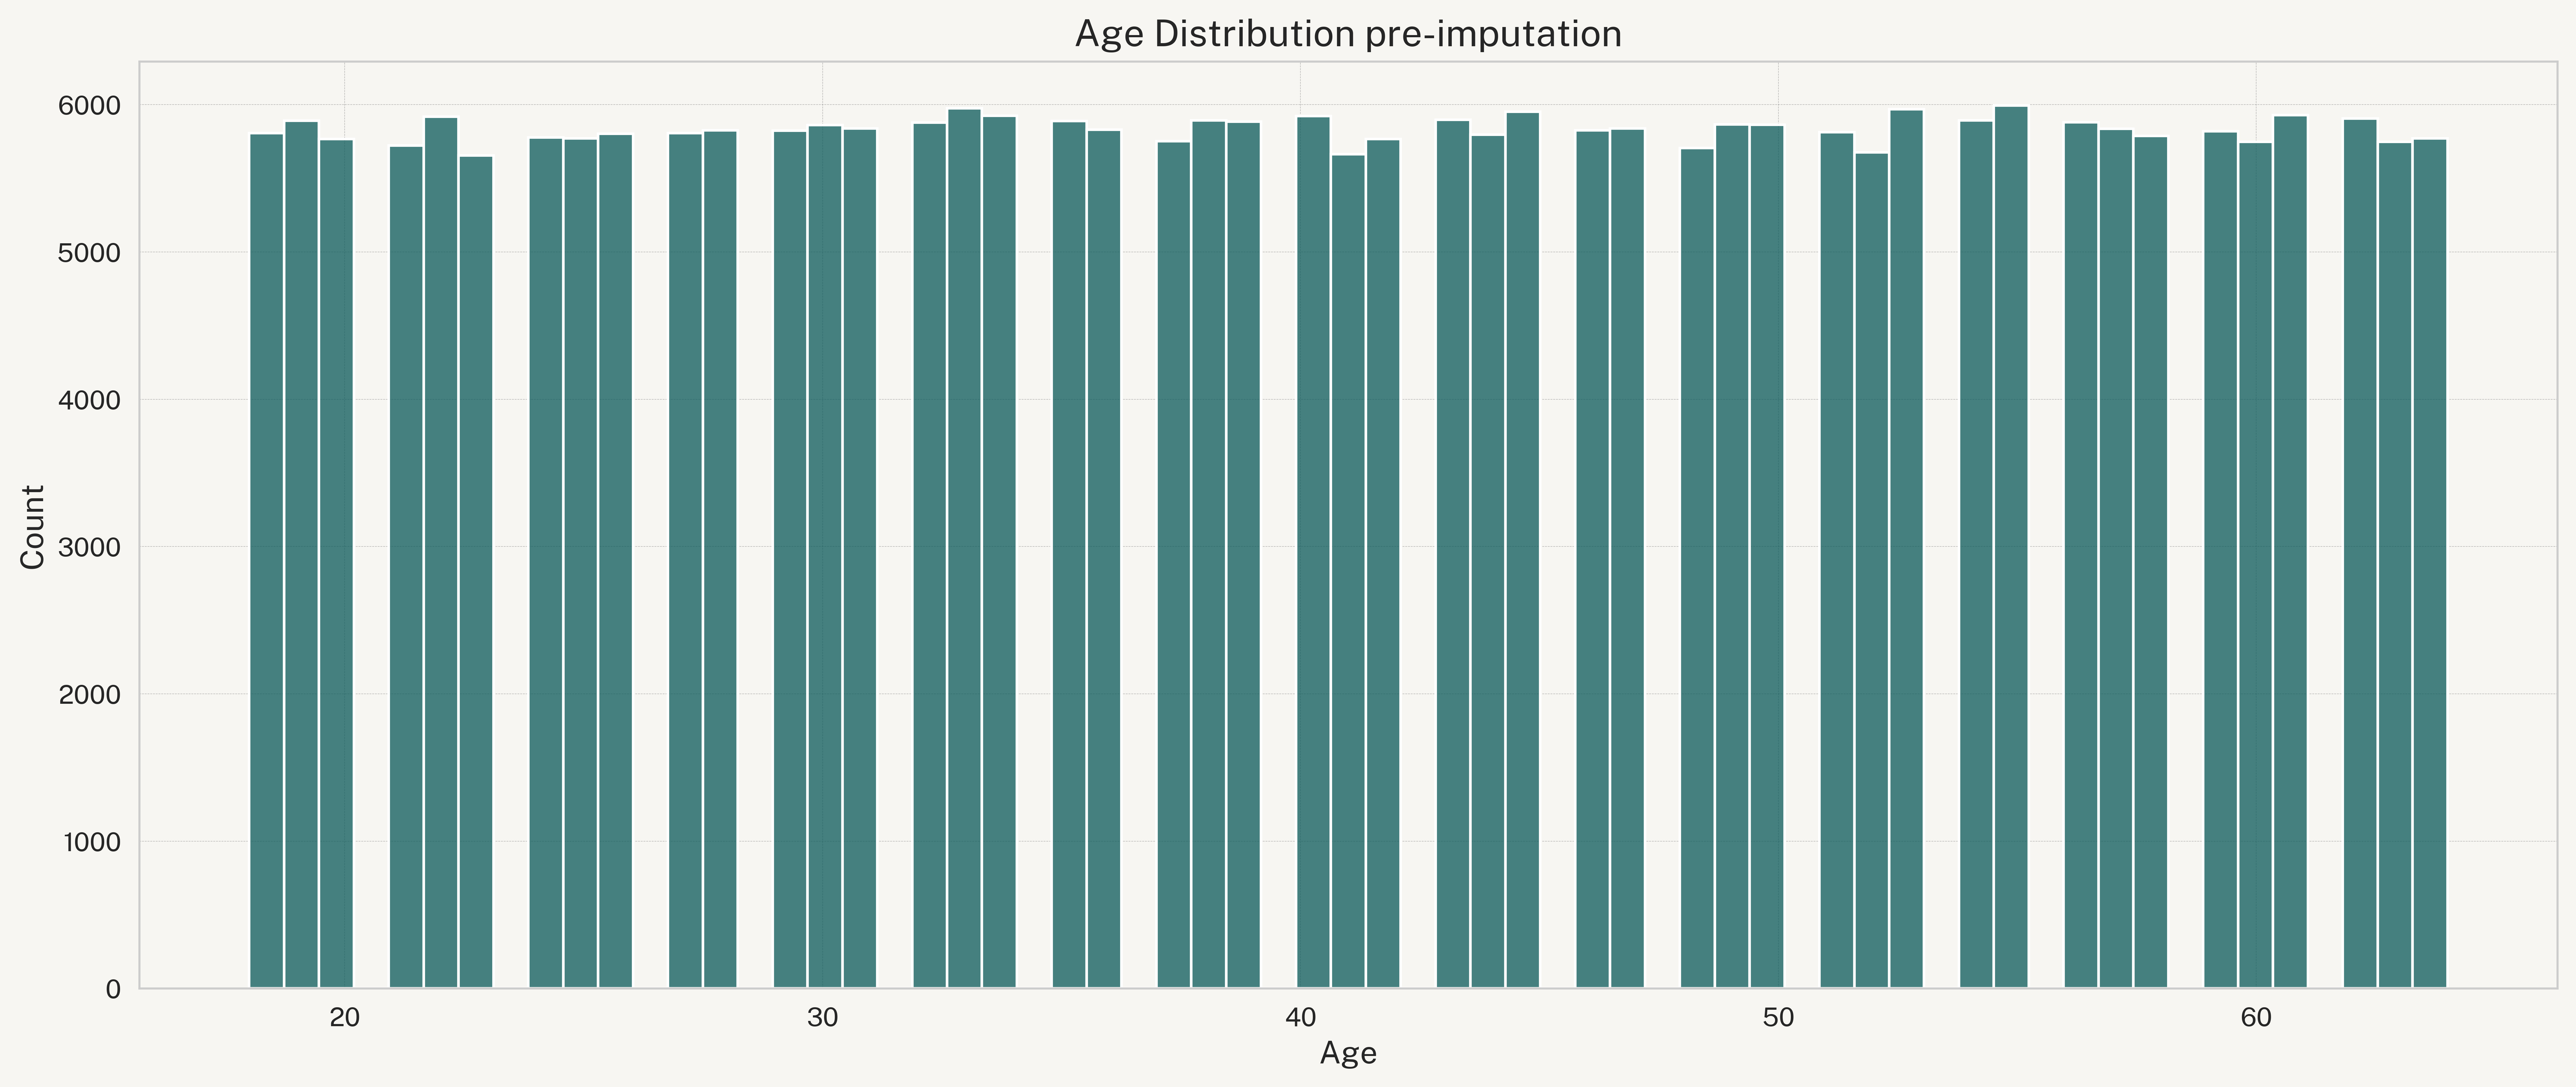

In [79]:

sns.histplot(data = insurance_data, x='age')
plt.xlabel('Age')
plt.title("Age Distribution pre-imputation")
plt.tight_layout()
plt.show()

This shows that `age` can be imputed with the ~~mean~~ nearest values.

In [80]:
insurance_data['age'] = insurance_data['age'].interpolate(method="nearest")

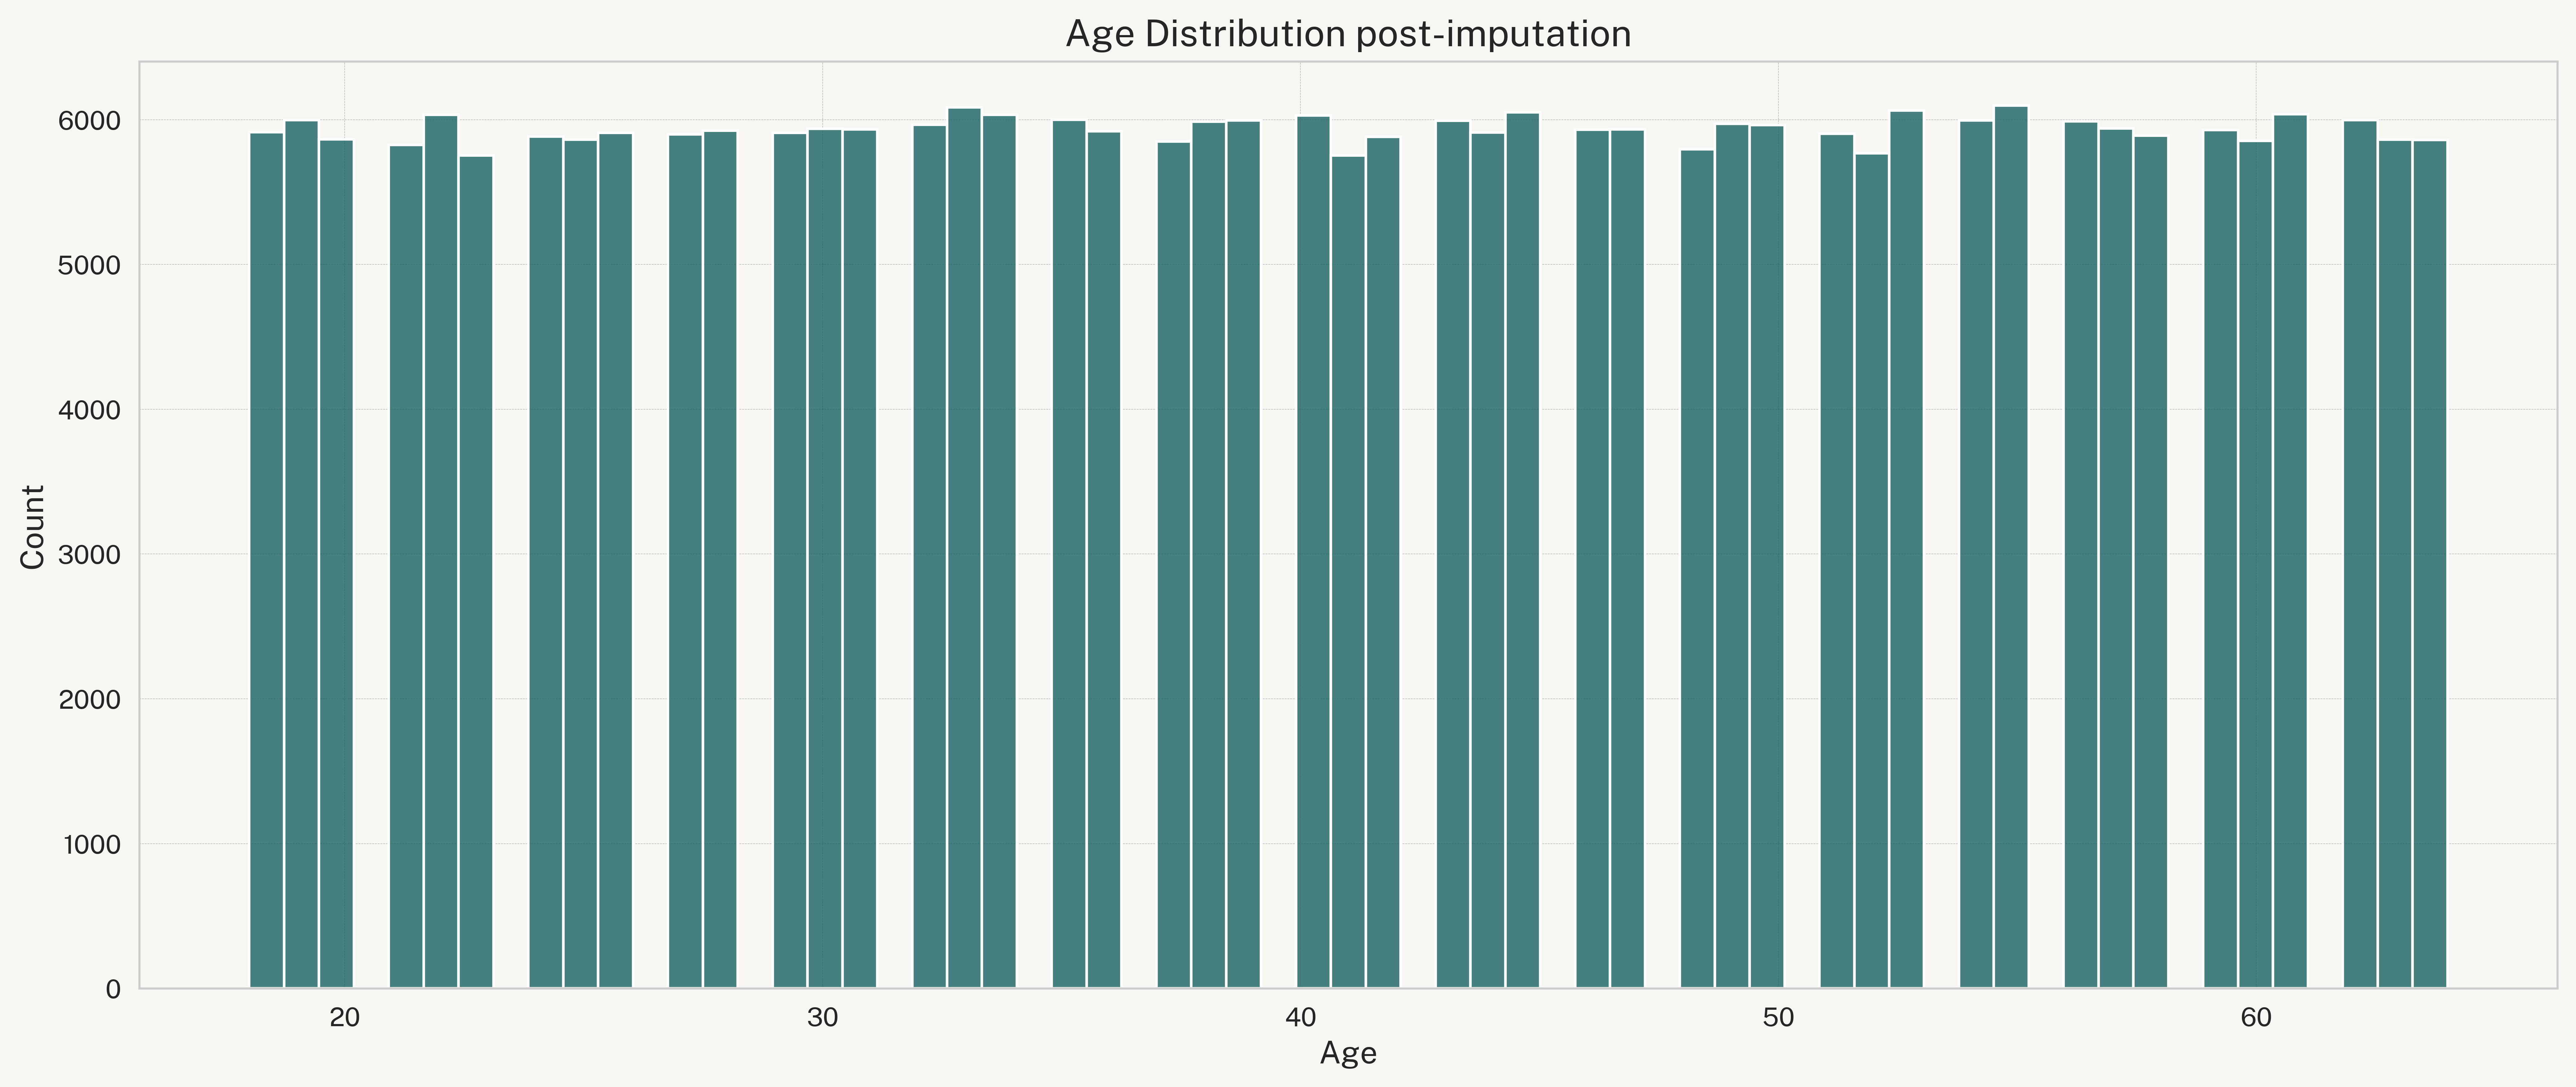

In [81]:

sns.histplot(data = insurance_data, x='age')
plt.xlabel('Age')
plt.title("Age Distribution post-imputation")
plt.tight_layout()
plt.show()

In [82]:
insurance_data['age'].isna().sum()

0

#### Health score

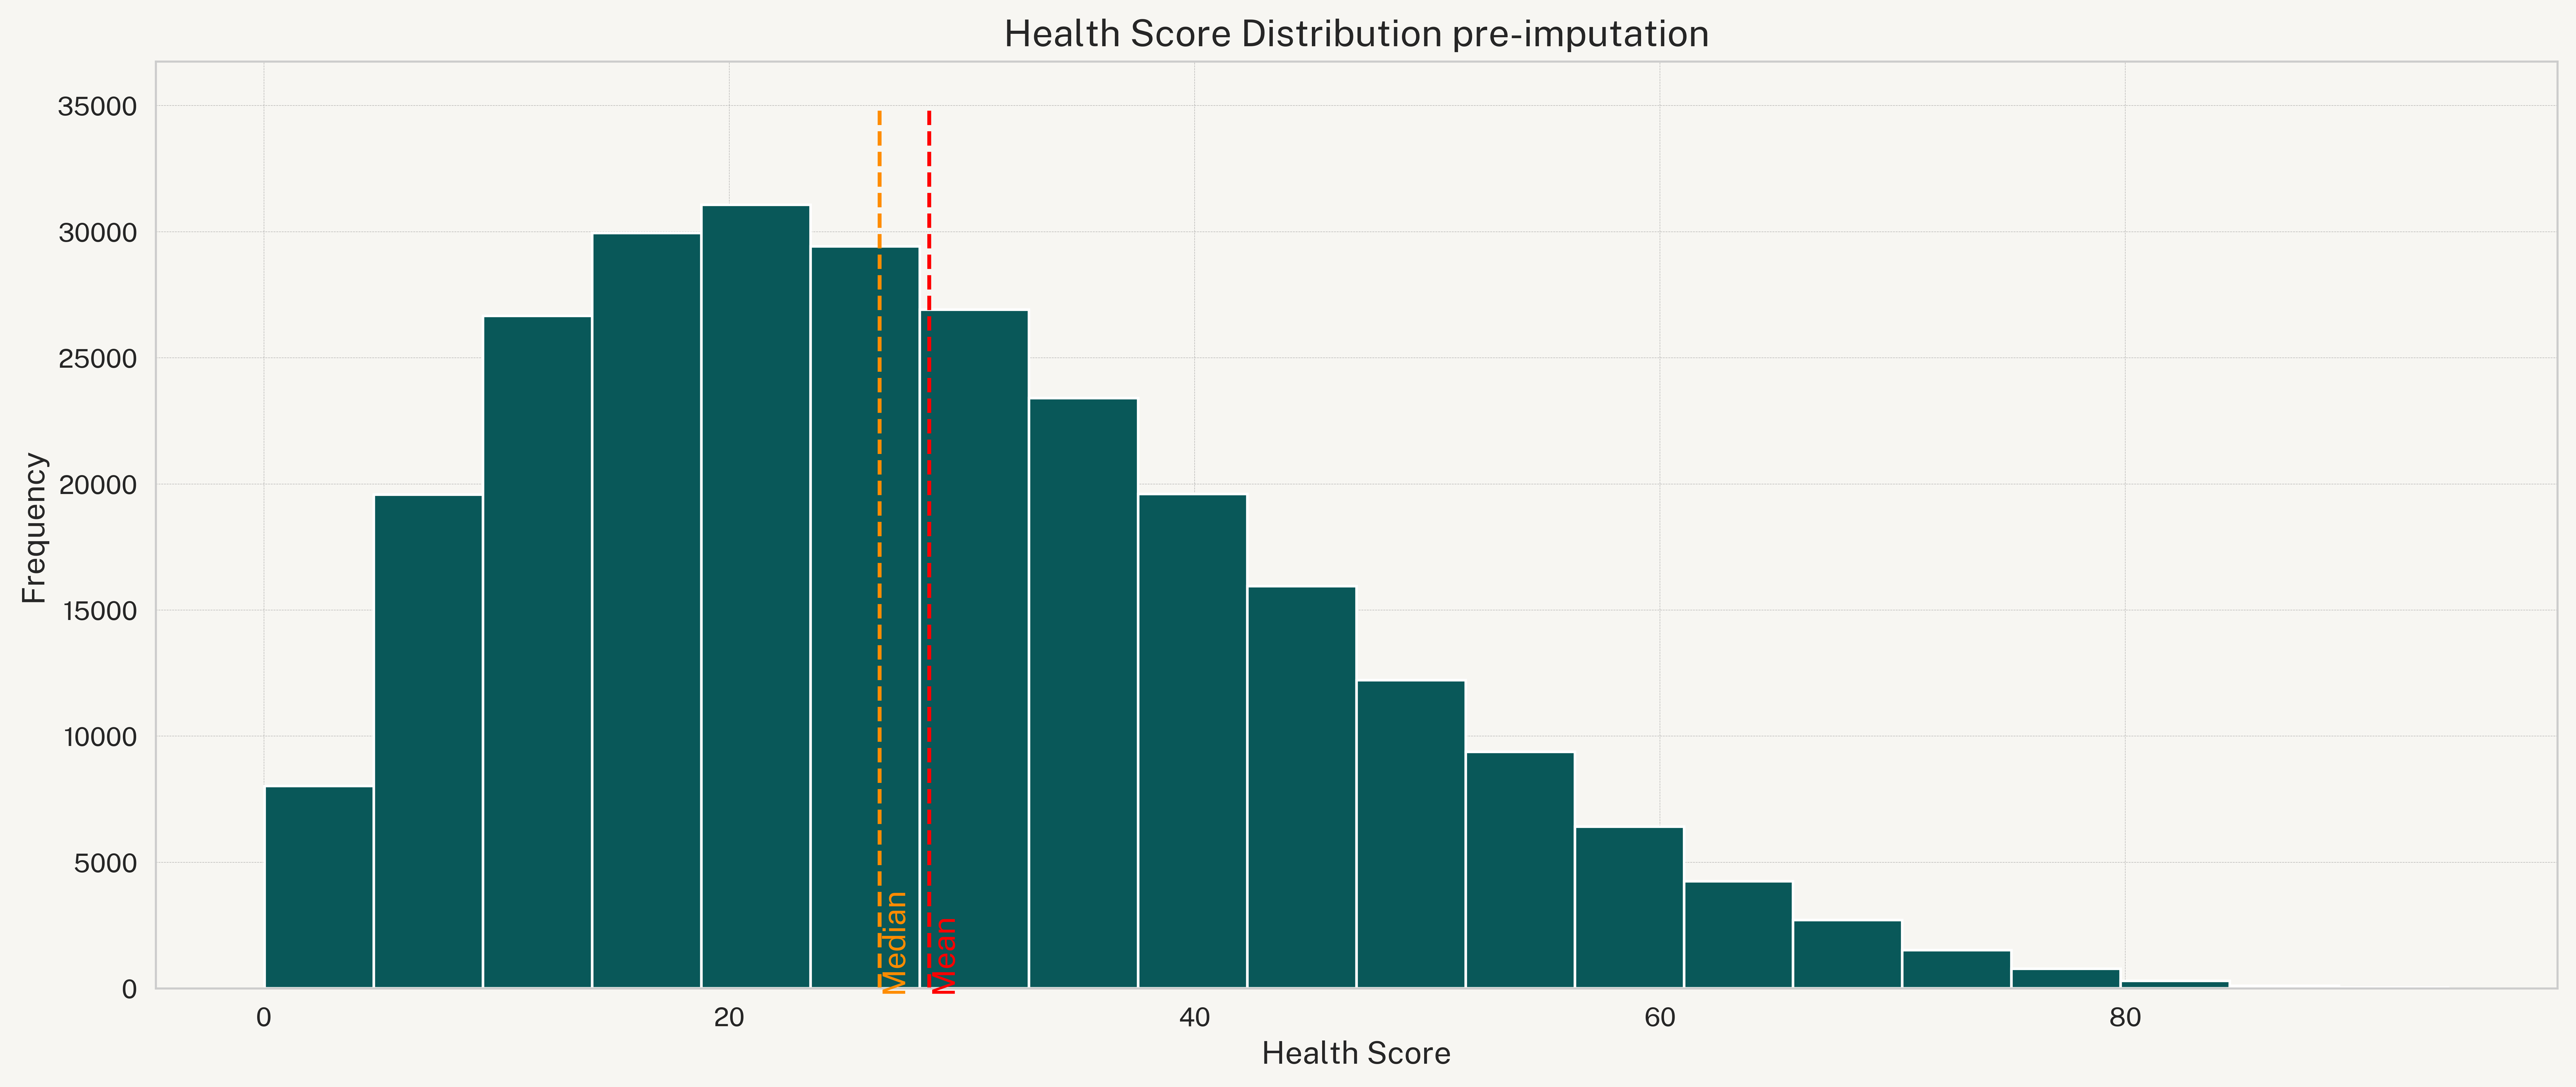

In [83]:
insurance_data['health_score'].plot(kind='hist', bins=20)
plt.xlabel('Health Score')
plt.title("Health Score Distribution pre-imputation")

plt.vlines(insurance_data['health_score'].mean(), 0, 35000, color='red', linestyles='--', label='Mean')
plt.vlines(insurance_data['health_score'].median(), 0, 35000, color='darkorange', linestyles='--', label='Mean')

# add xtixk labels for mean and median
plt.text(insurance_data['health_score'].mean(), 0, 'Mean', rotation=90, color='red')
plt.text(insurance_data['health_score'].median(), 0, 'Median', rotation=90, color='darkorange')
plt.tight_layout()
plt.show()

To preserve the central tendency, we can do median imputation here.

In [84]:
insurance_data['health_score'] = insurance_data['health_score'].fillna(insurance_data['health_score'].median())

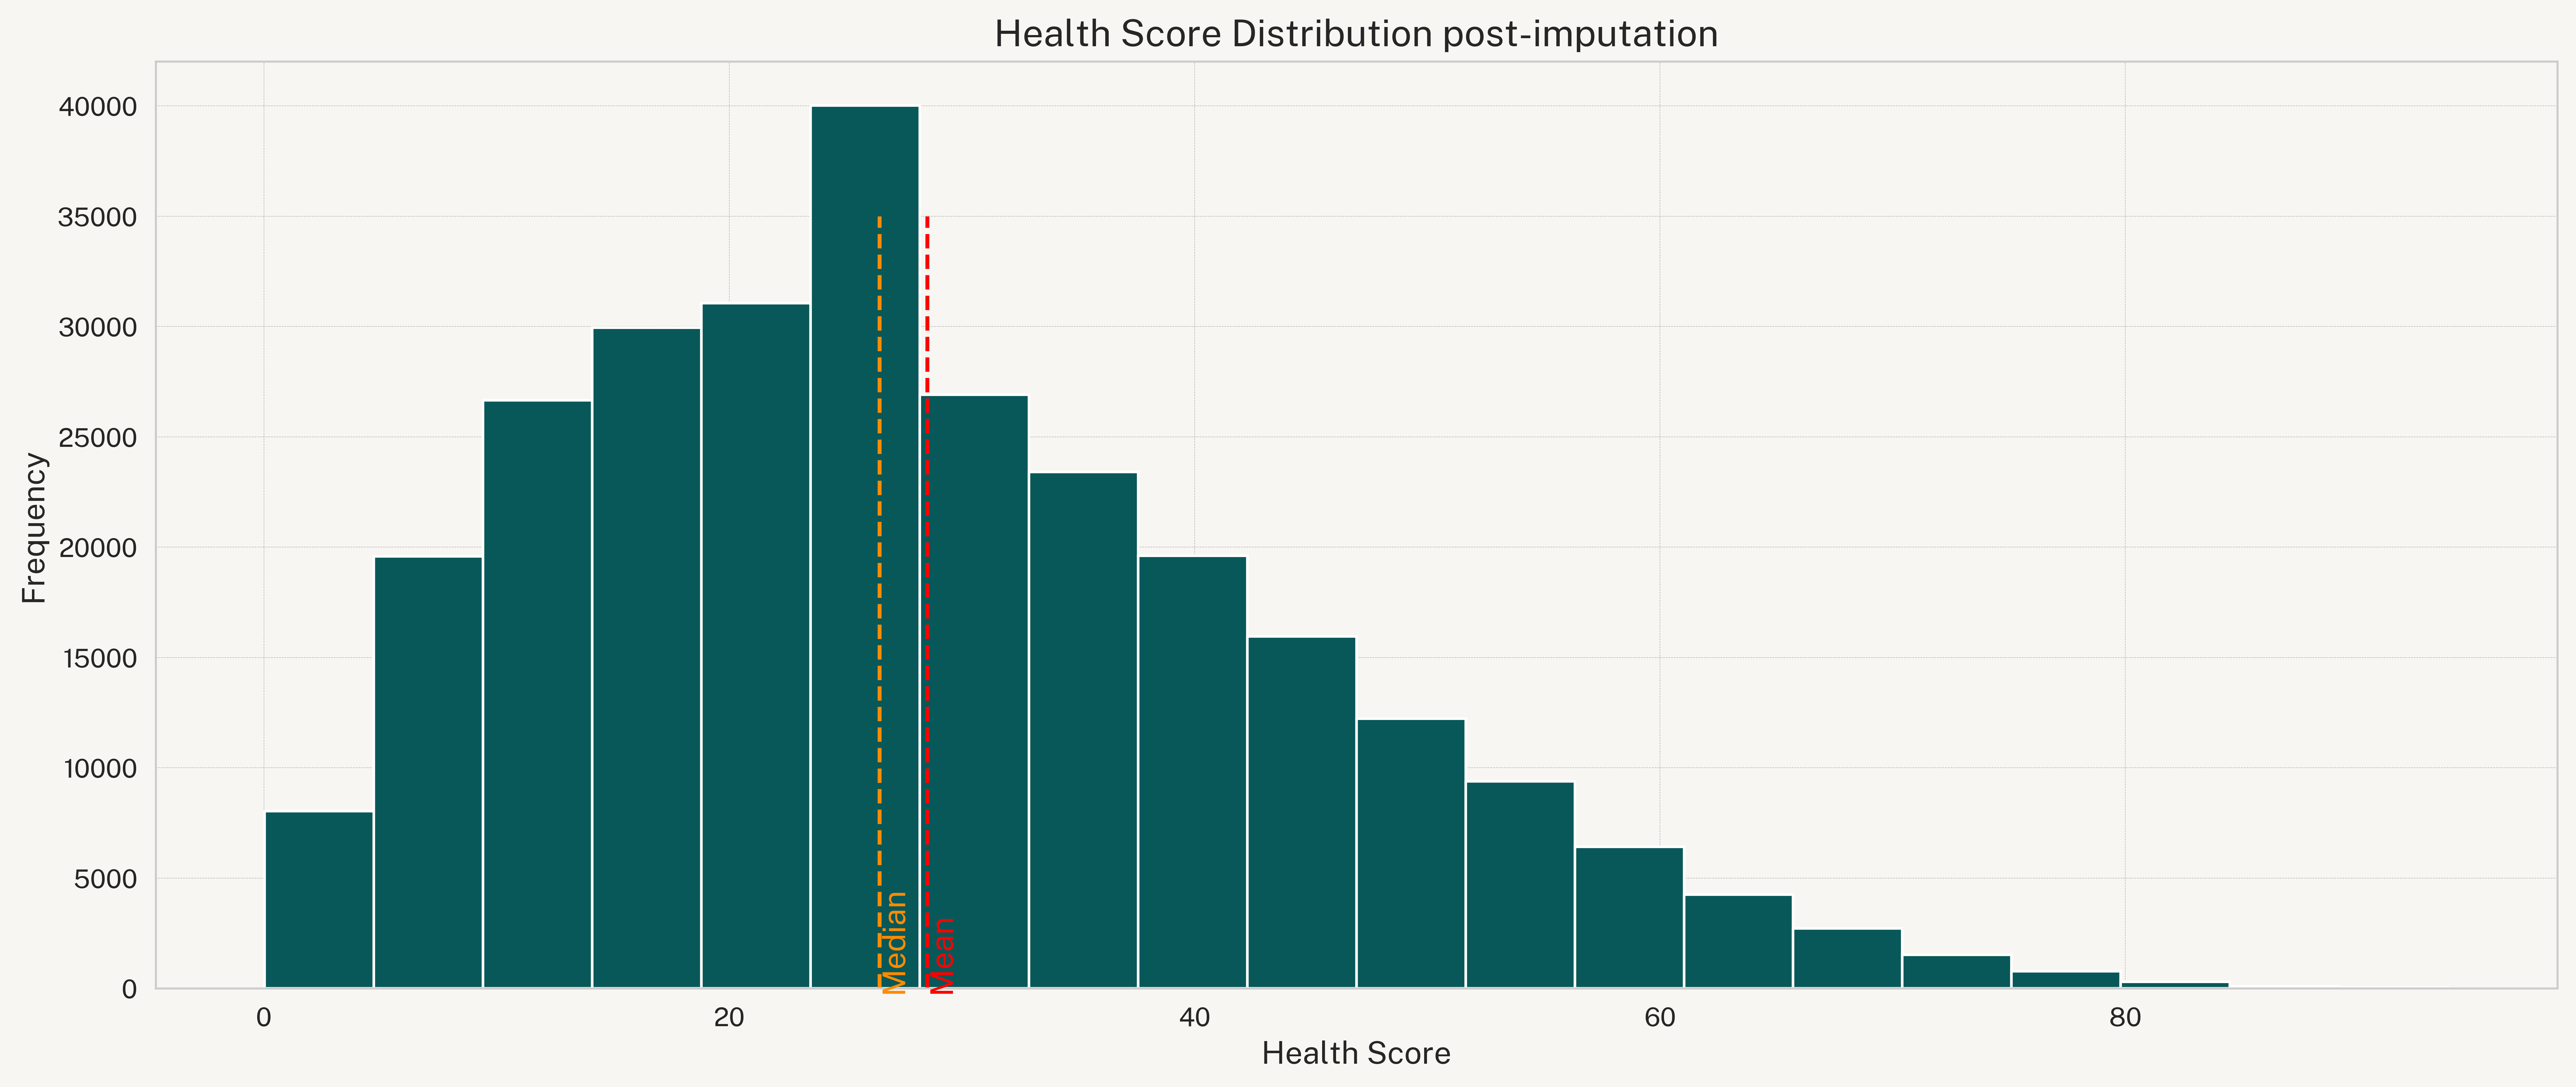

In [85]:
insurance_data['health_score'].plot(kind='hist', bins=20)
plt.xlabel('Health Score')
plt.title("Health Score Distribution post-imputation")

plt.vlines(insurance_data['health_score'].mean(), 0, 35000, color='red', linestyles='--', label='Mean')
plt.vlines(insurance_data['health_score'].median(), 0, 35000, color='darkorange', linestyles='--', label='Mean')

# add xtixk labels for mean and median
plt.text(insurance_data['health_score'].mean(), 0, 'Mean', rotation=90, color='red')
plt.text(insurance_data['health_score'].median(), 0, 'Median', rotation=90, color='darkorange')
plt.tight_layout()
plt.show()

In [86]:
insurance_data['health_score'].isna().sum()

0

#### Annual Income

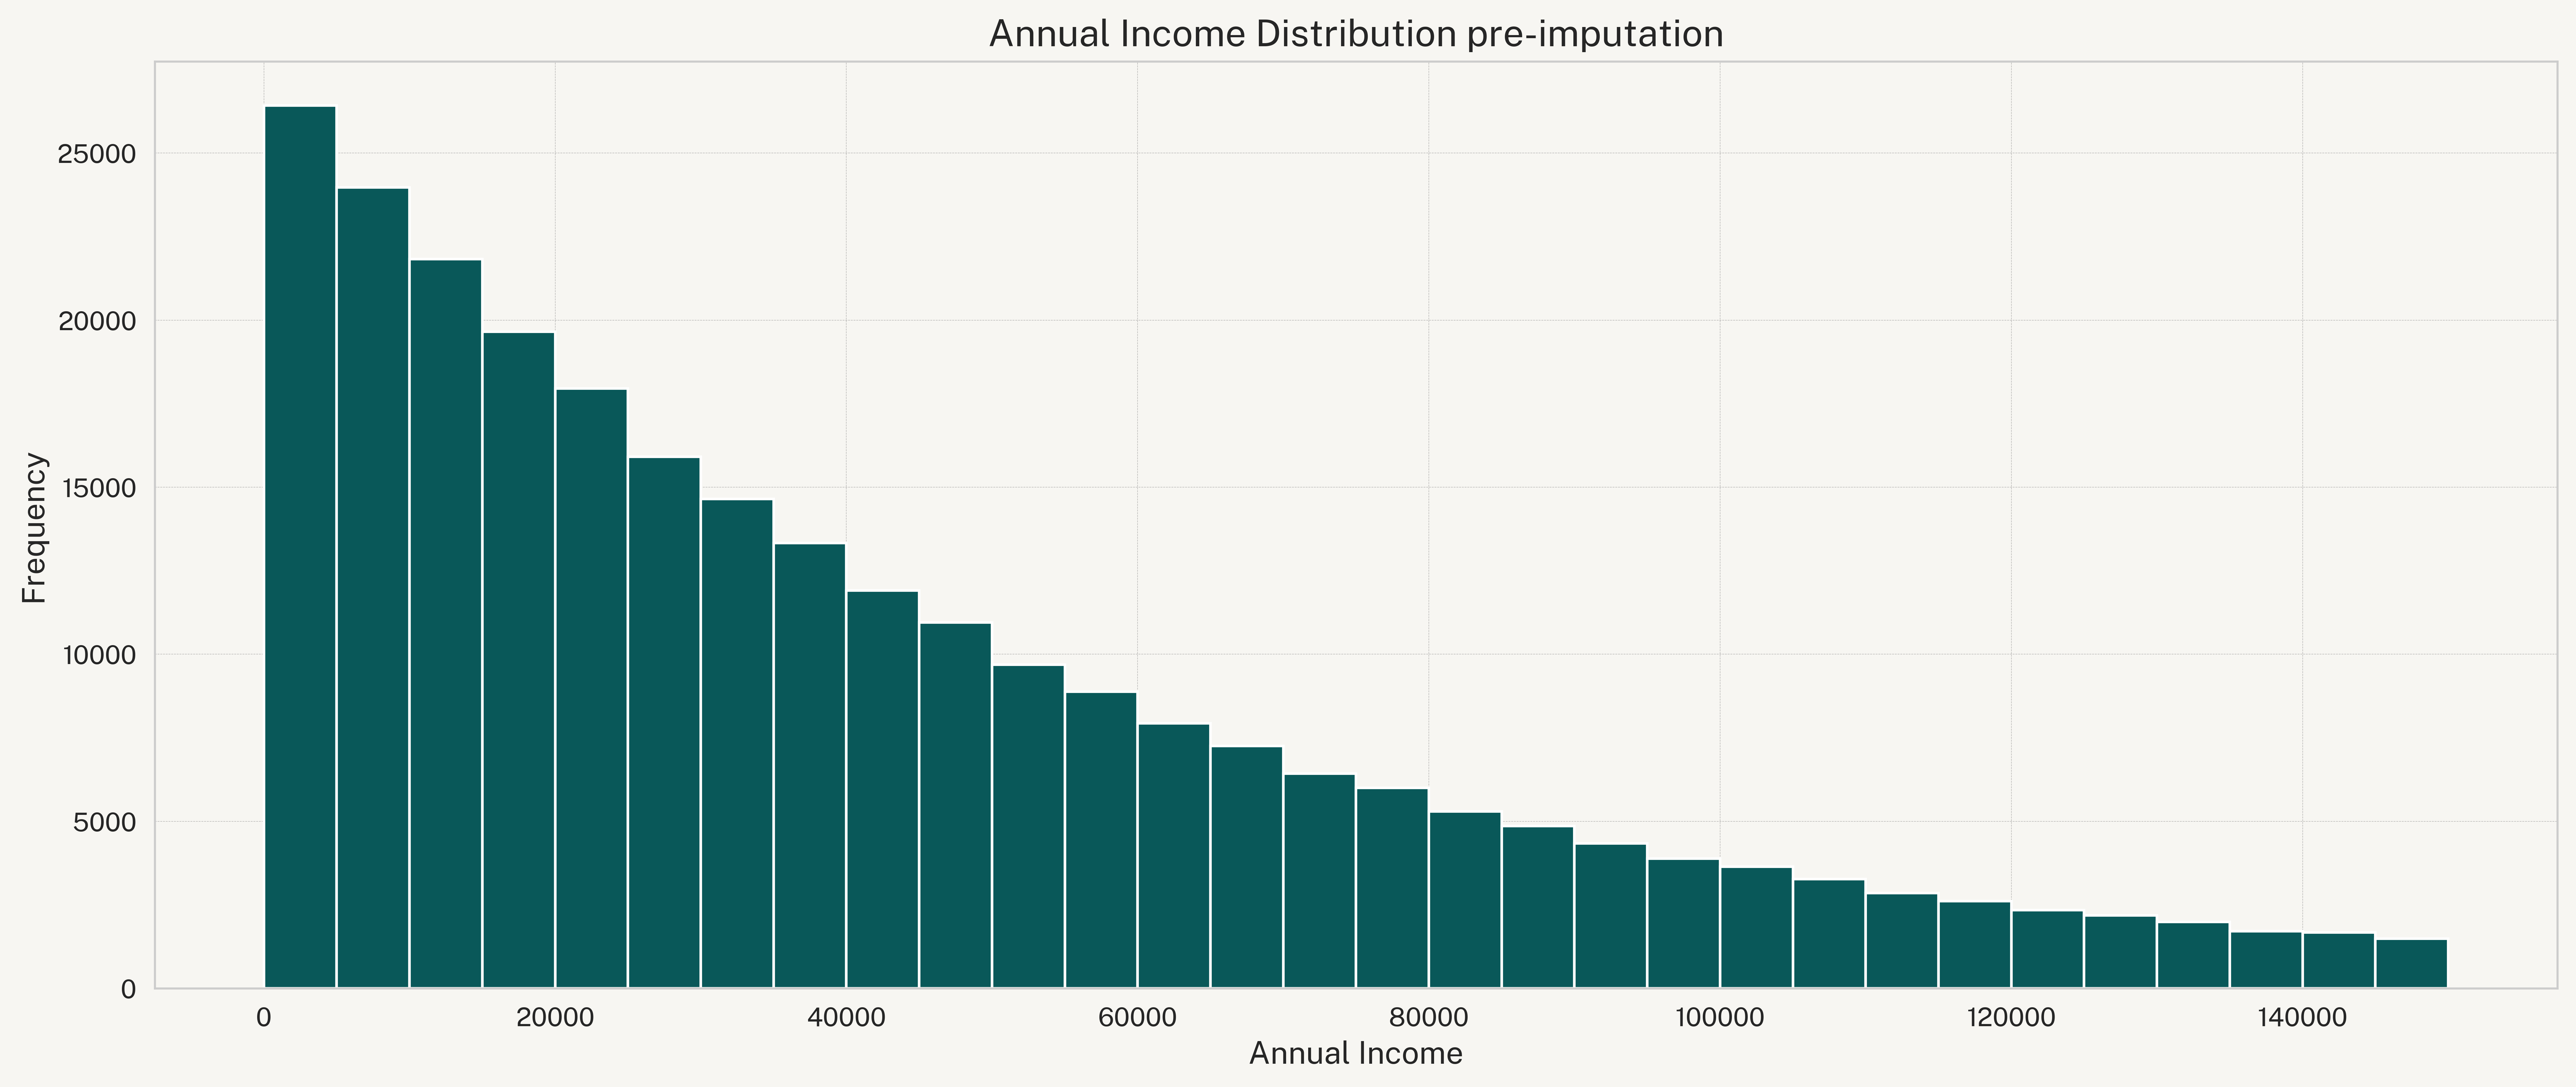

In [87]:
insurance_data['annual_income'].plot(kind='hist', bins=30)
plt.xlabel('Annual Income')
plt.title("Annual Income Distribution pre-imputation")
plt.tight_layout()
plt.show()

In [88]:
insurance_data['annual_income'] = insurance_data['annual_income'].fillna(insurance_data['annual_income'].median())

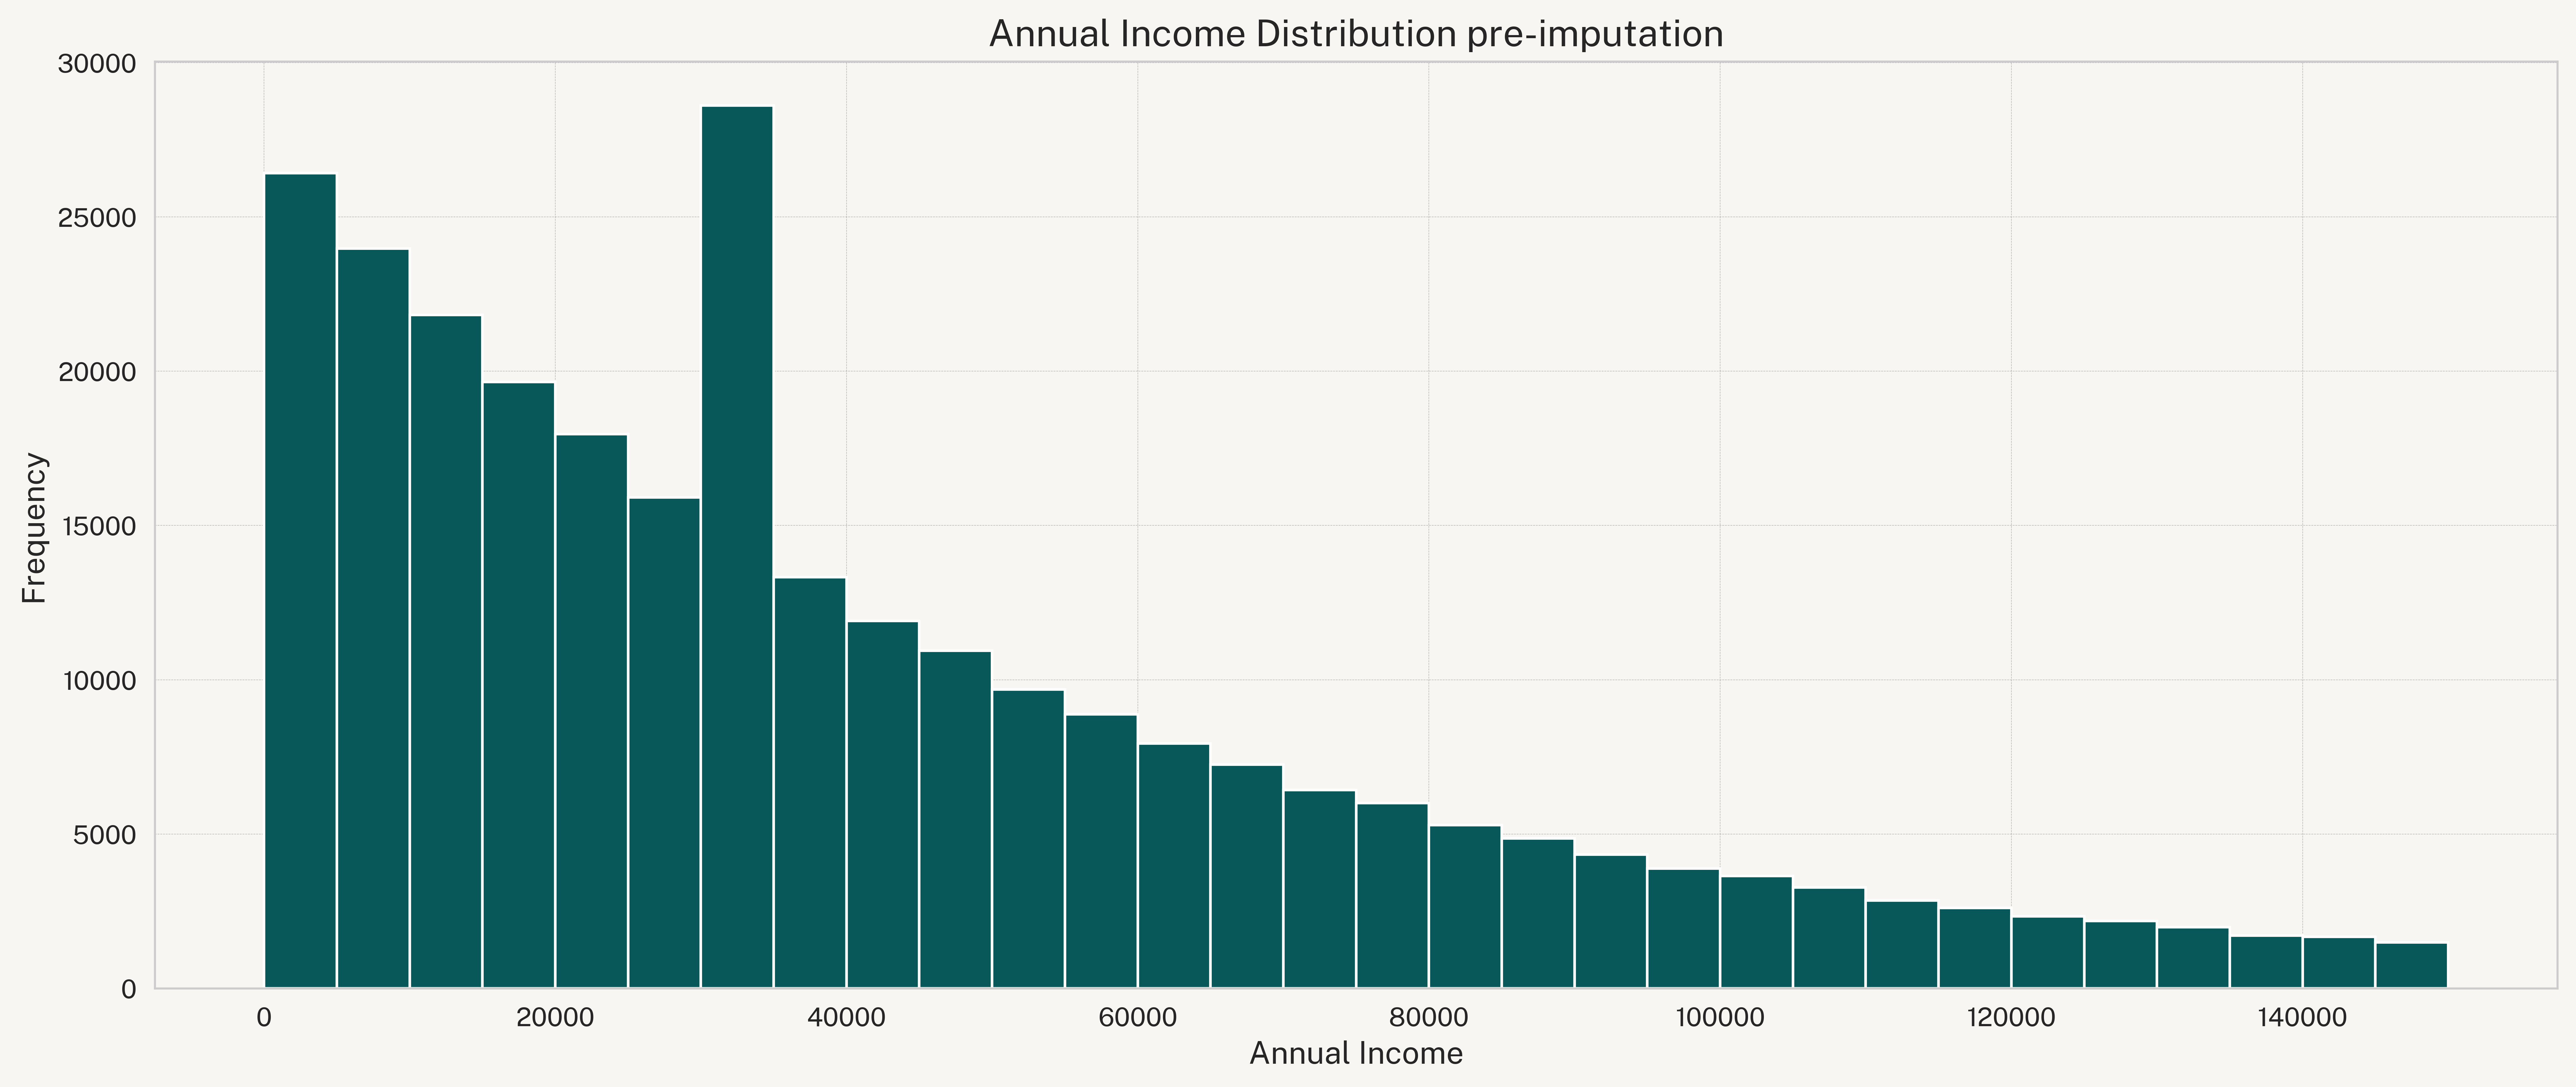

In [89]:
insurance_data['annual_income'].plot(kind='hist', bins=30)
plt.xlabel('Annual Income')
plt.title("Annual Income Distribution pre-imputation")
plt.tight_layout()
plt.show()

We should also drop values with aanual income <= 20,000 since anything lesser is highly unlikely in real-world insurance underwriting.

In [90]:
insurance_data.drop(insurance_data[insurance_data['annual_income'] <= 20000].index, inplace=True)

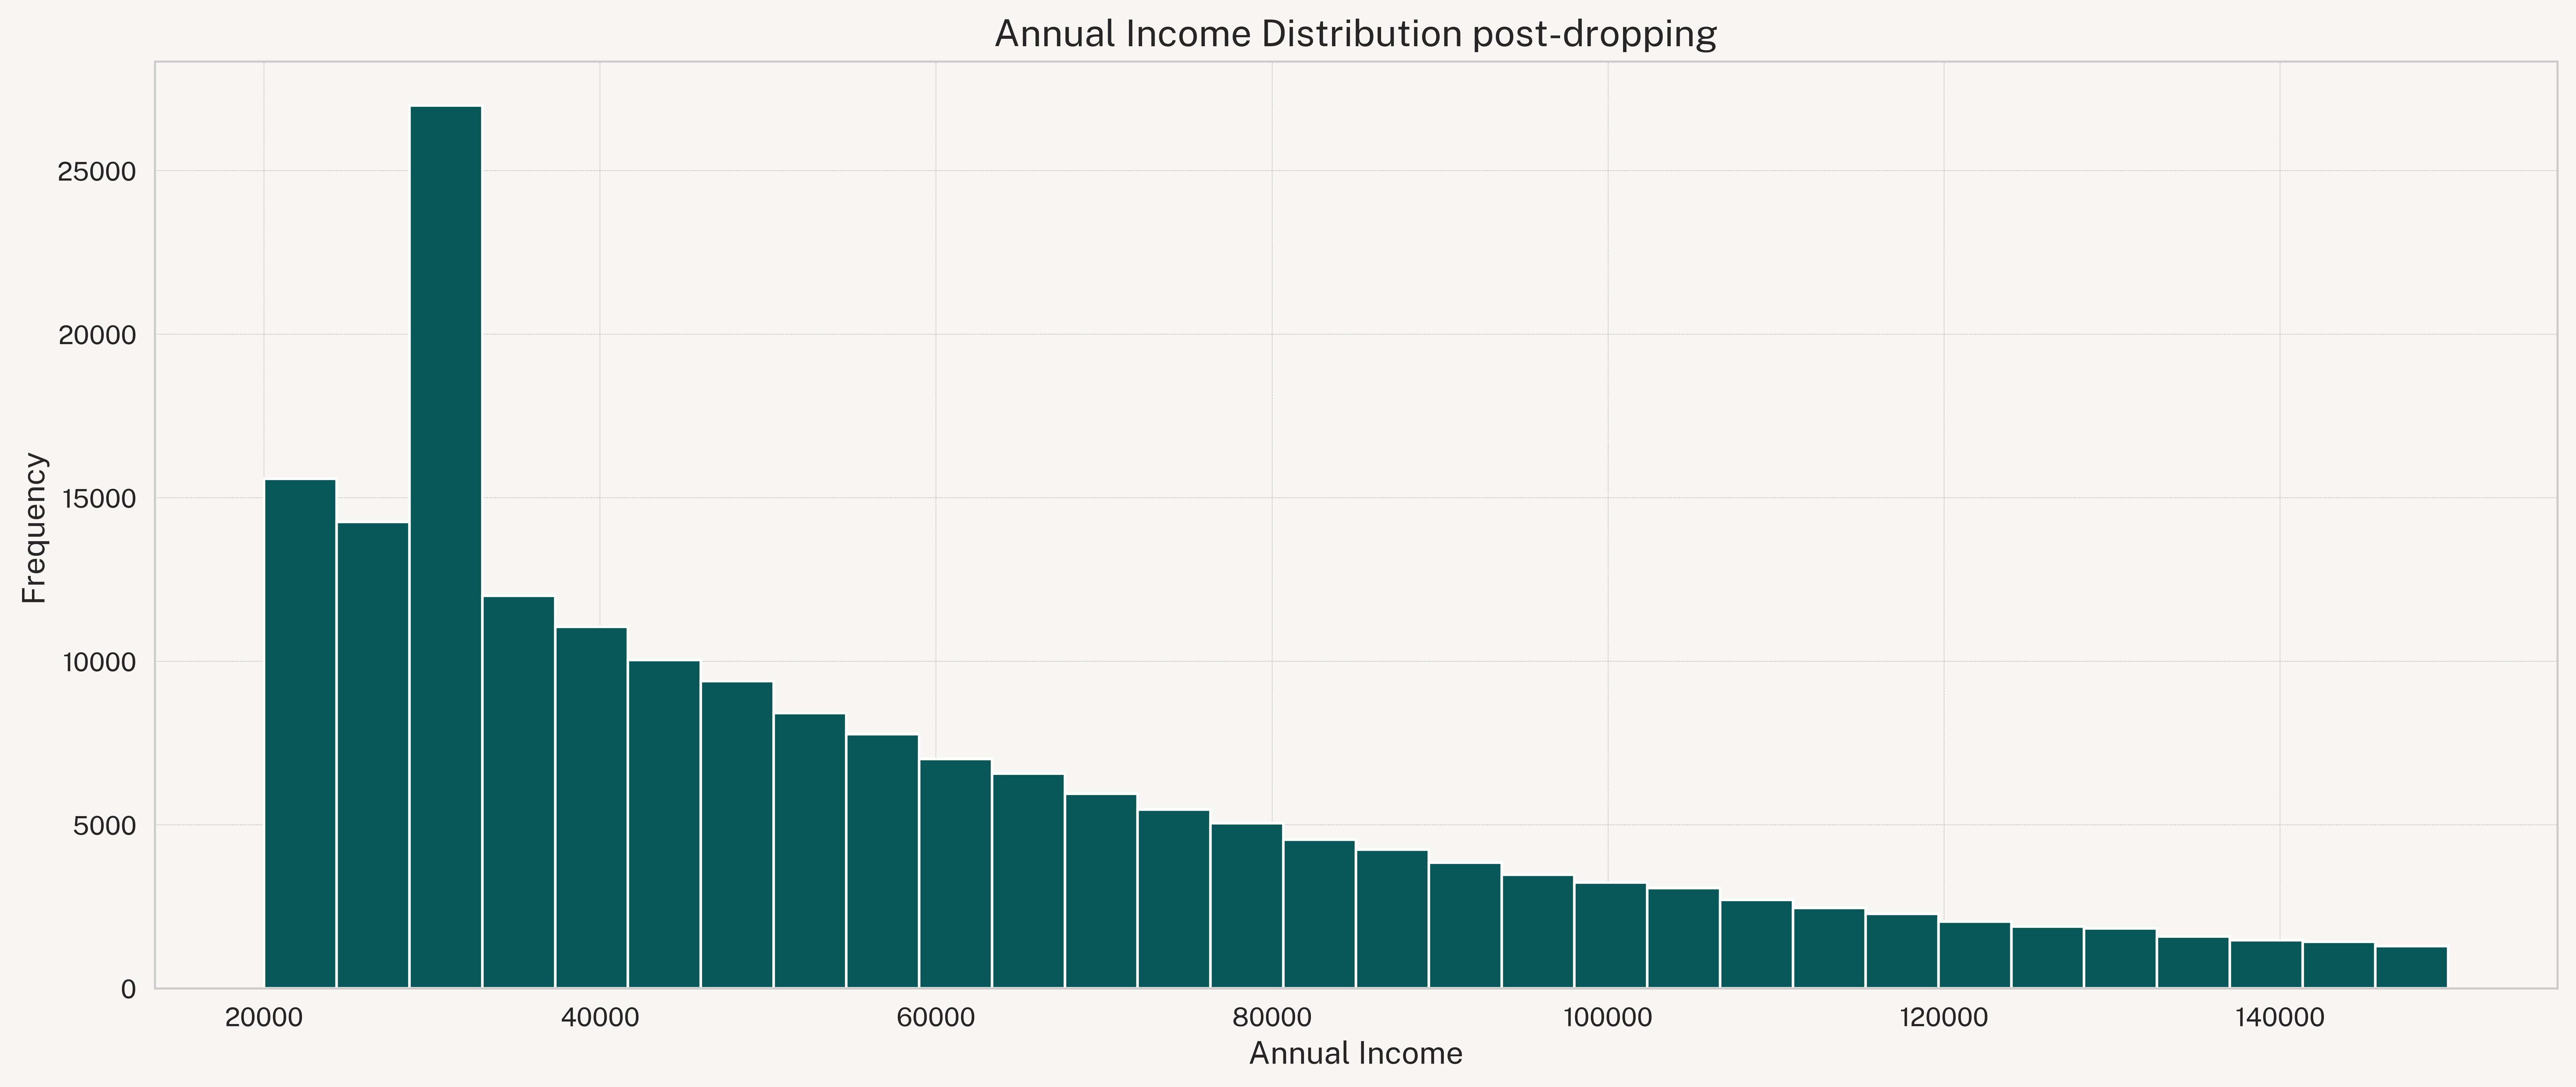

In [91]:
insurance_data['annual_income'].plot(kind='hist', bins=30)
plt.xlabel('Annual Income')
plt.title("Annual Income Distribution post-dropping")
plt.tight_layout()
plt.show()

#### Credit score

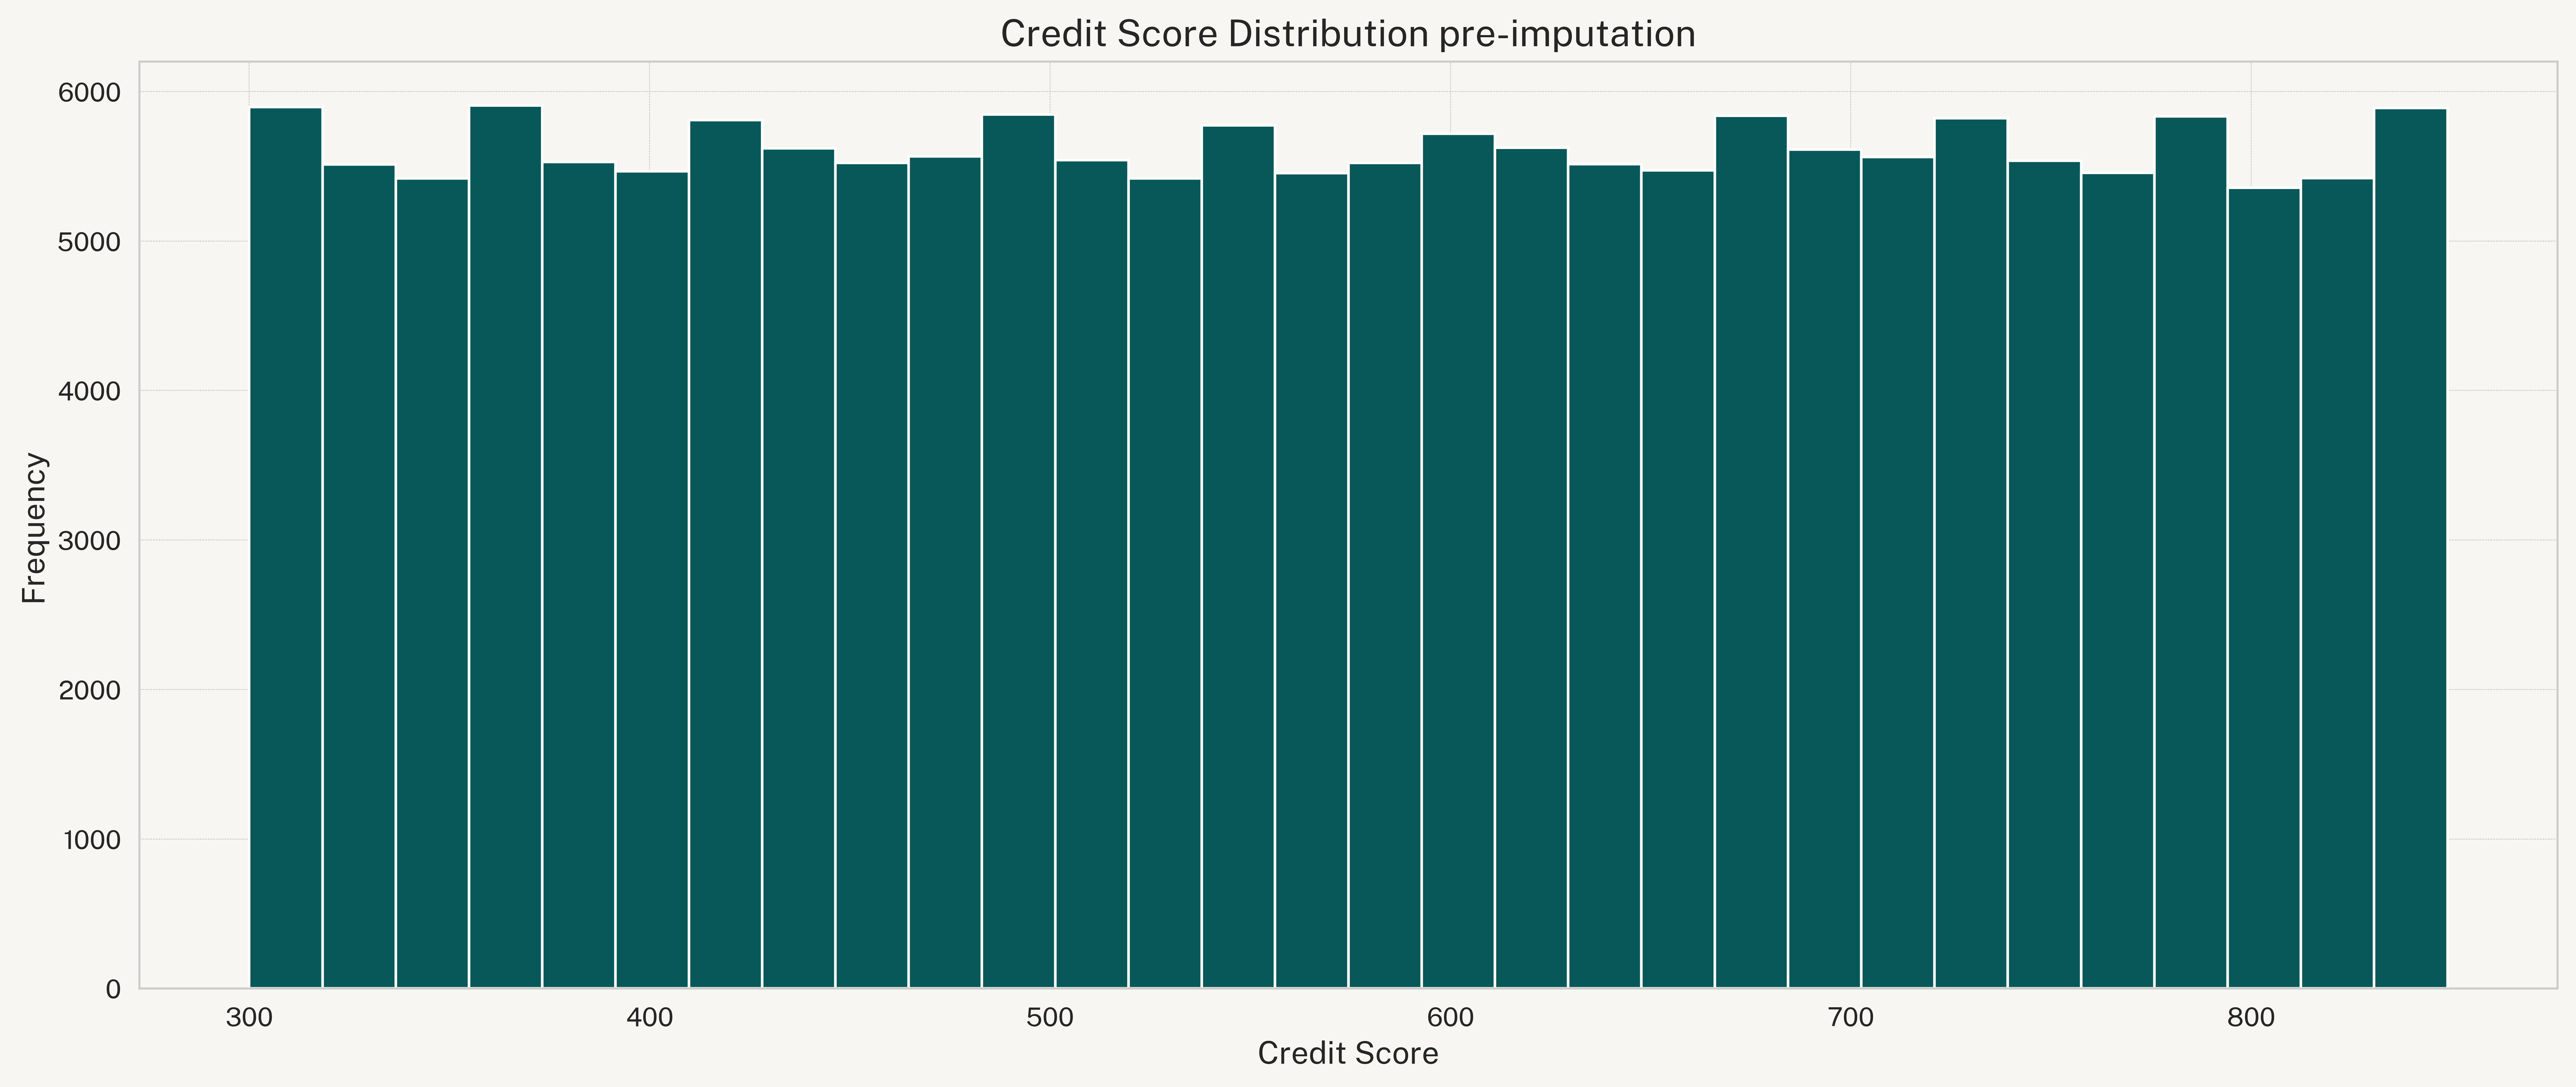

In [92]:
insurance_data['credit_score'].plot(kind='hist', bins=30)
plt.xlabel('Credit Score')
plt.title("Credit Score Distribution pre-imputation")
plt.tight_layout()
plt.show()

In [93]:
insurance_data['credit_score'].interpolate(method='nearest', inplace=True)

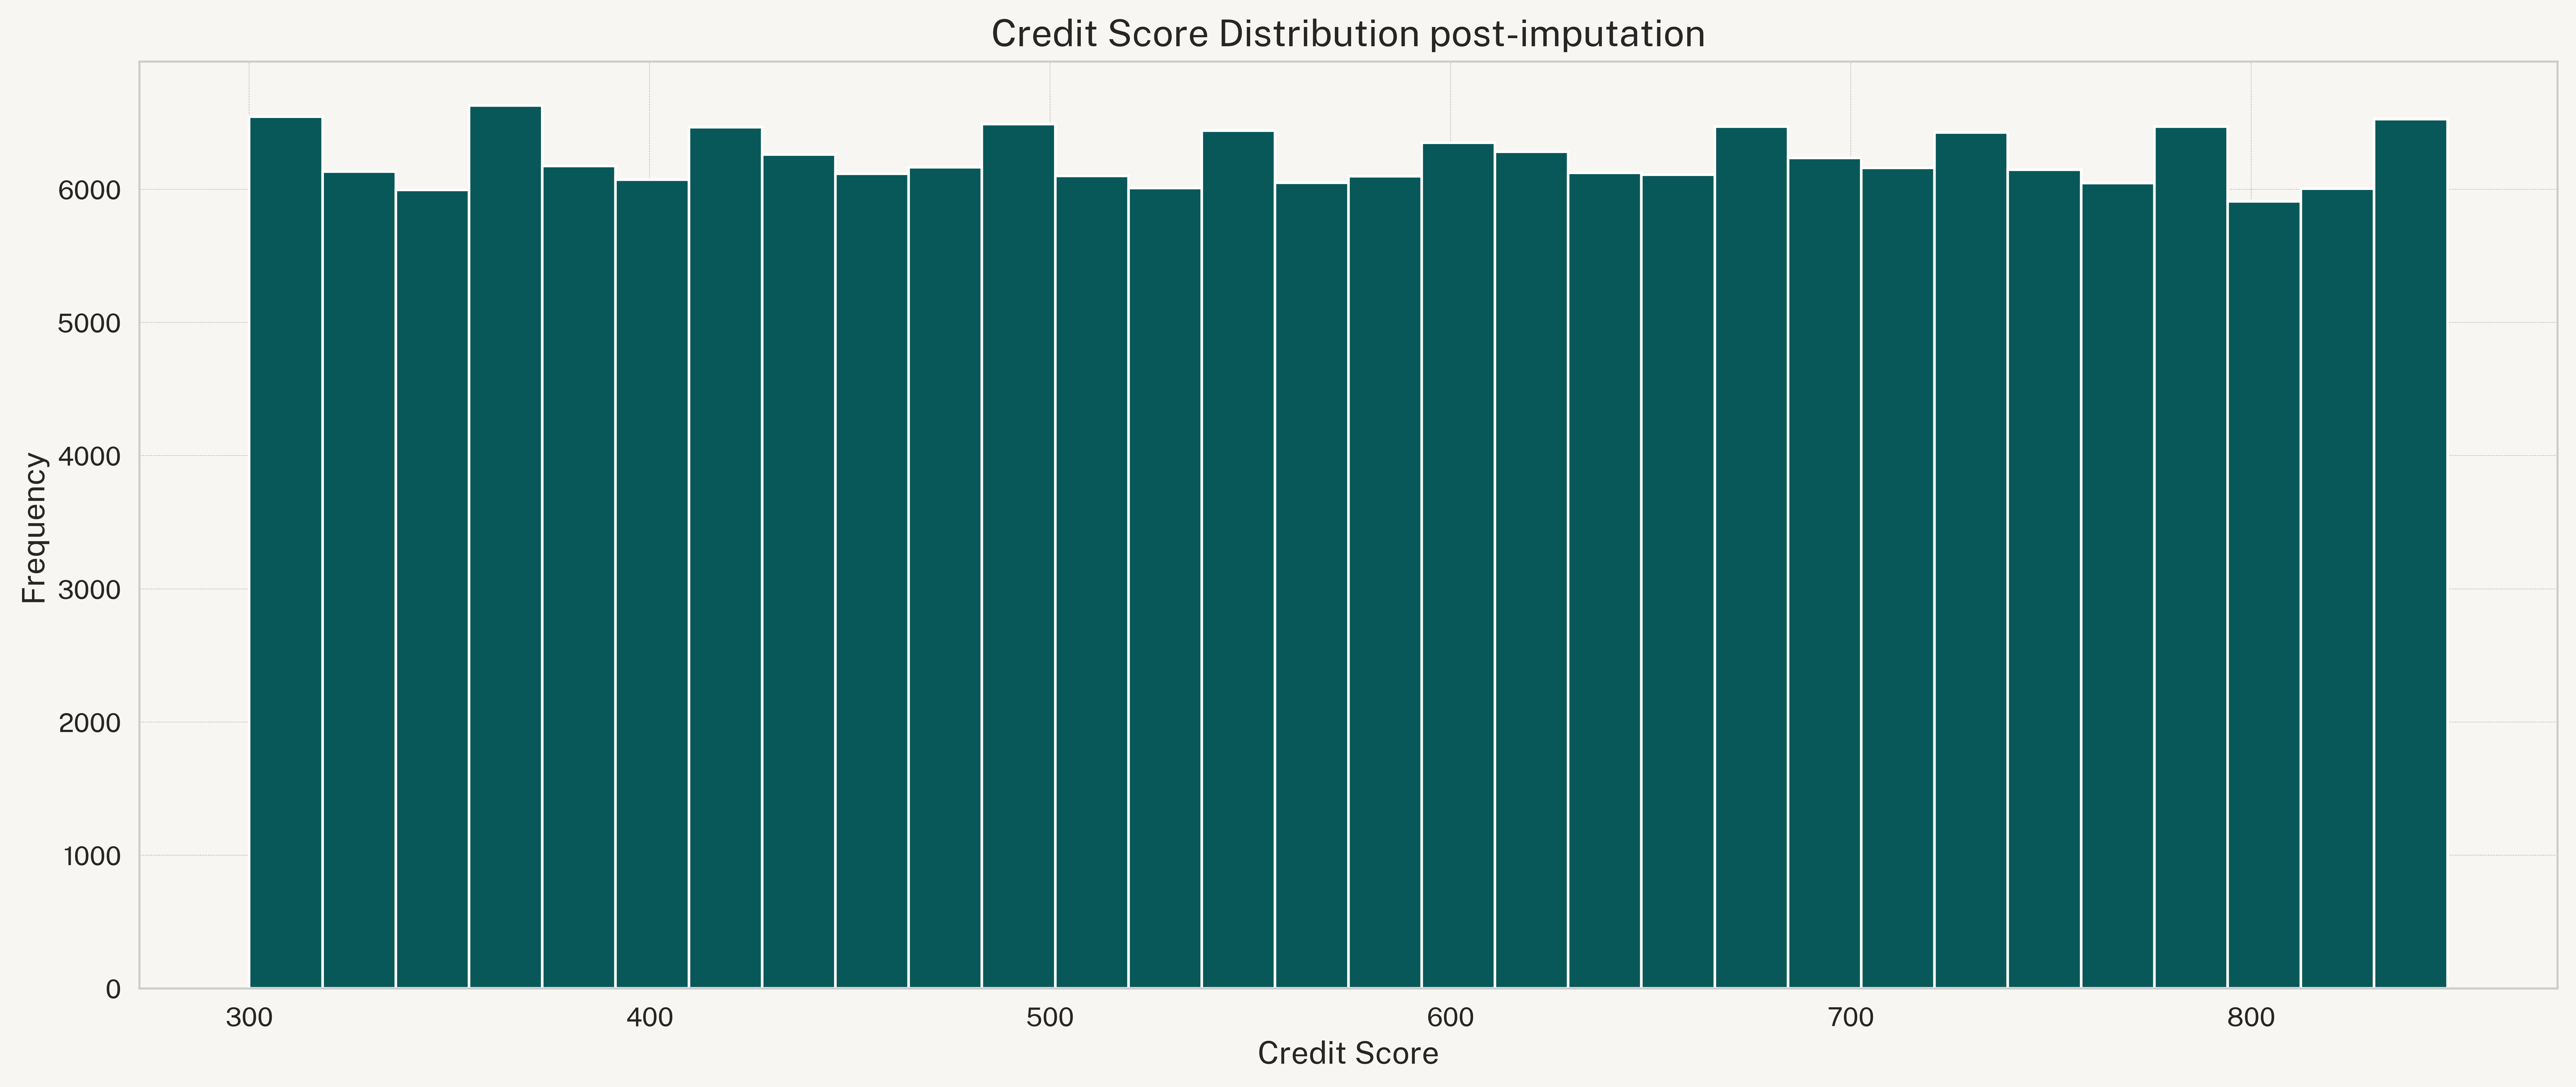

In [94]:
insurance_data['credit_score'].plot(kind='hist', bins=30)
plt.xlabel('Credit Score')
plt.title("Credit Score Distribution post-imputation")
plt.tight_layout()
plt.show()

#### Number of dependents

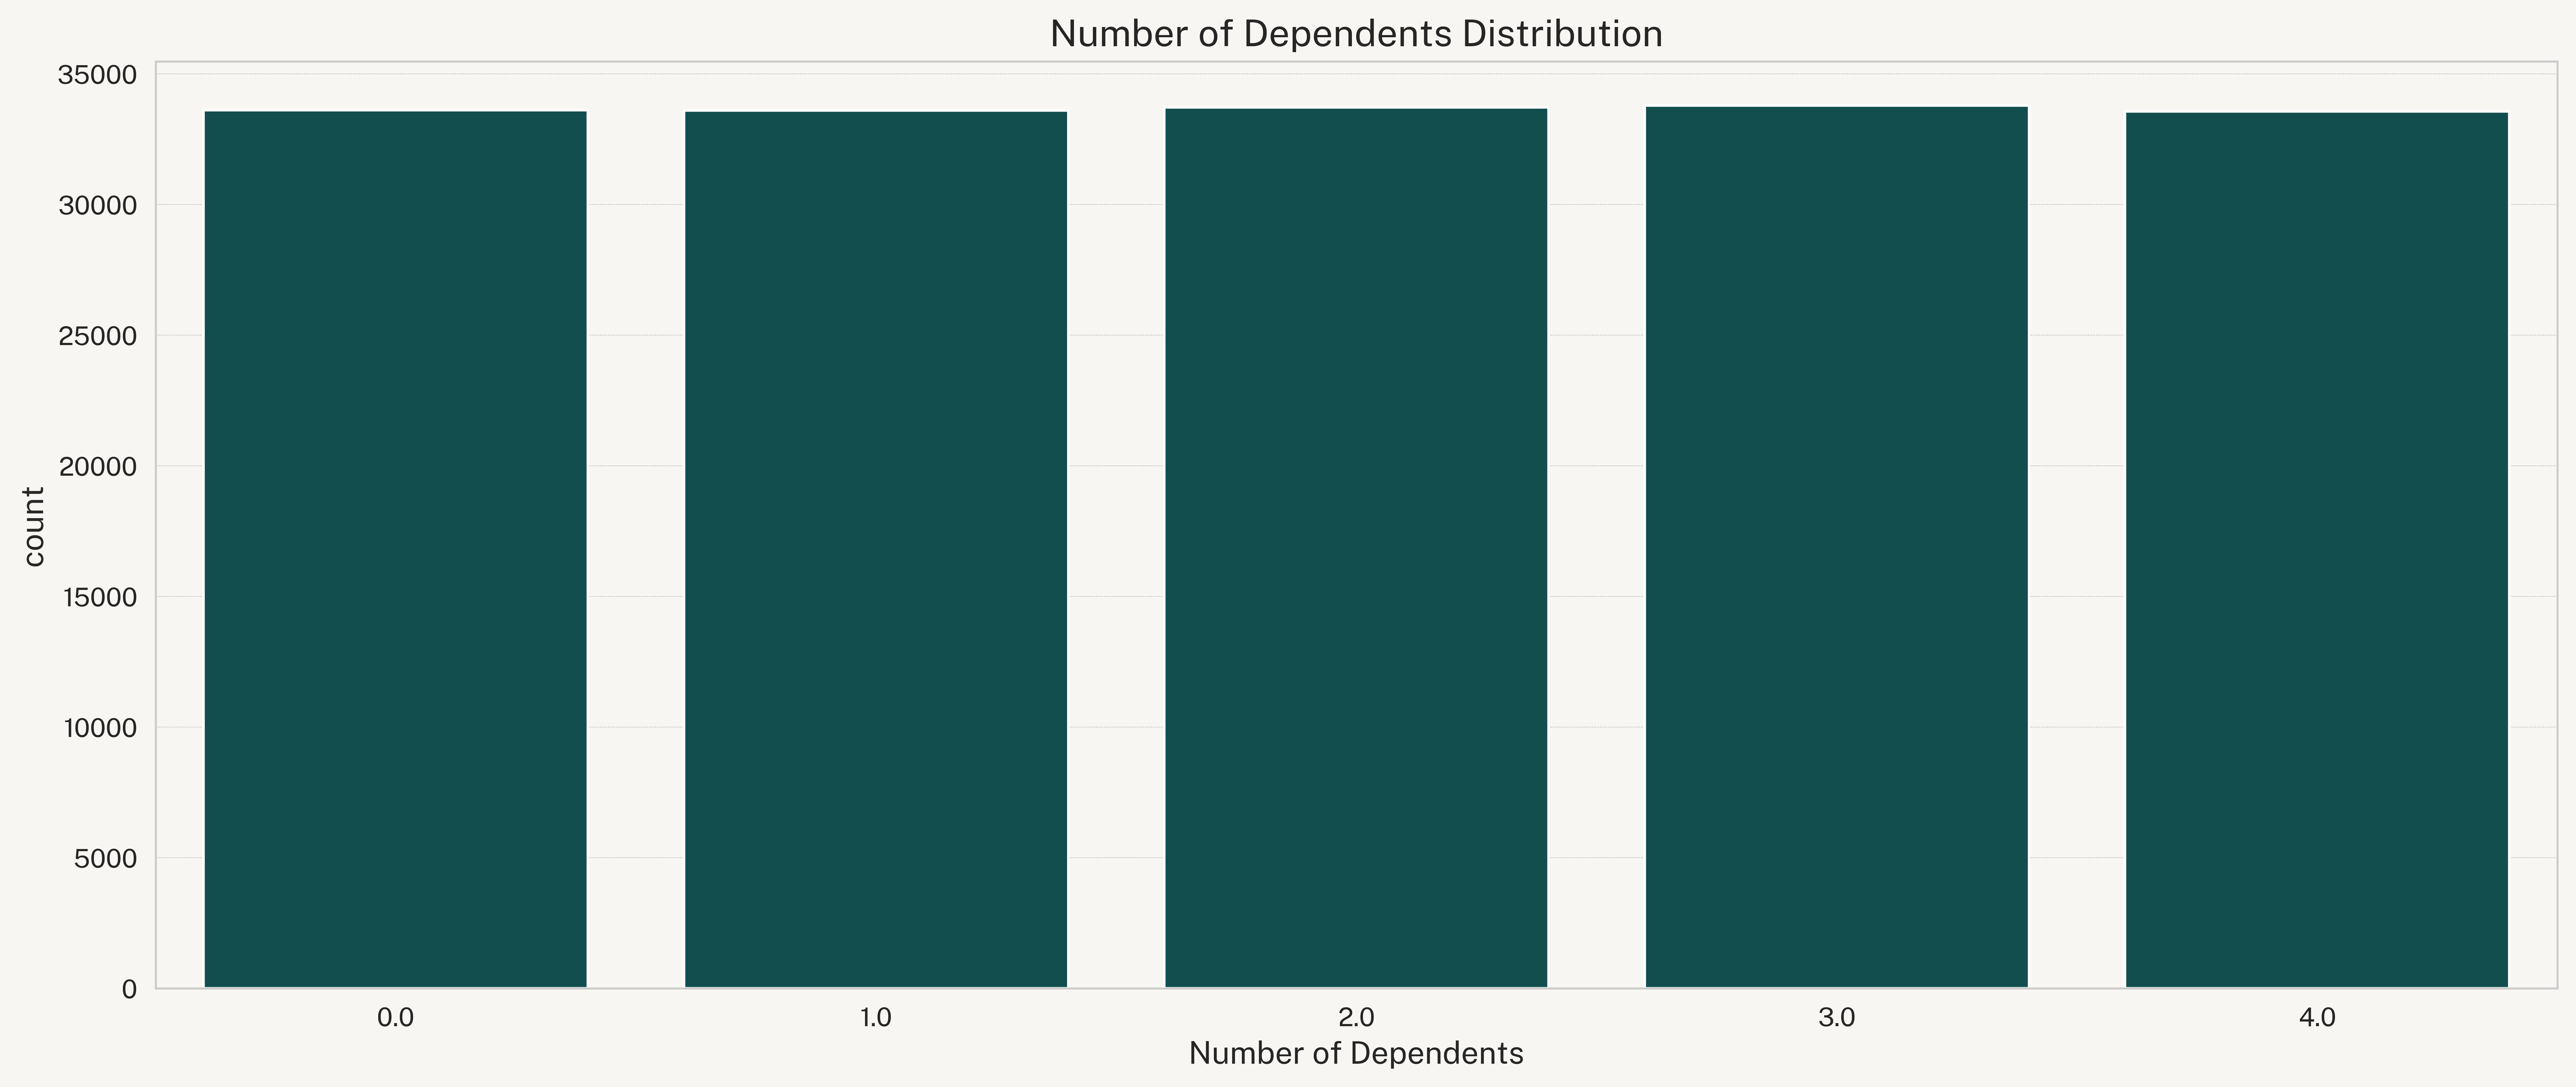

In [95]:
sns.countplot(data=insurance_data, x='number_of_dependents')
plt.xlabel('Number of Dependents')
plt.title("Number of Dependents Distribution")
plt.tight_layout()
plt.show()

In [96]:
insurance_data['number_of_dependents'] = insurance_data['number_of_dependents'].interpolate(method='nearest')

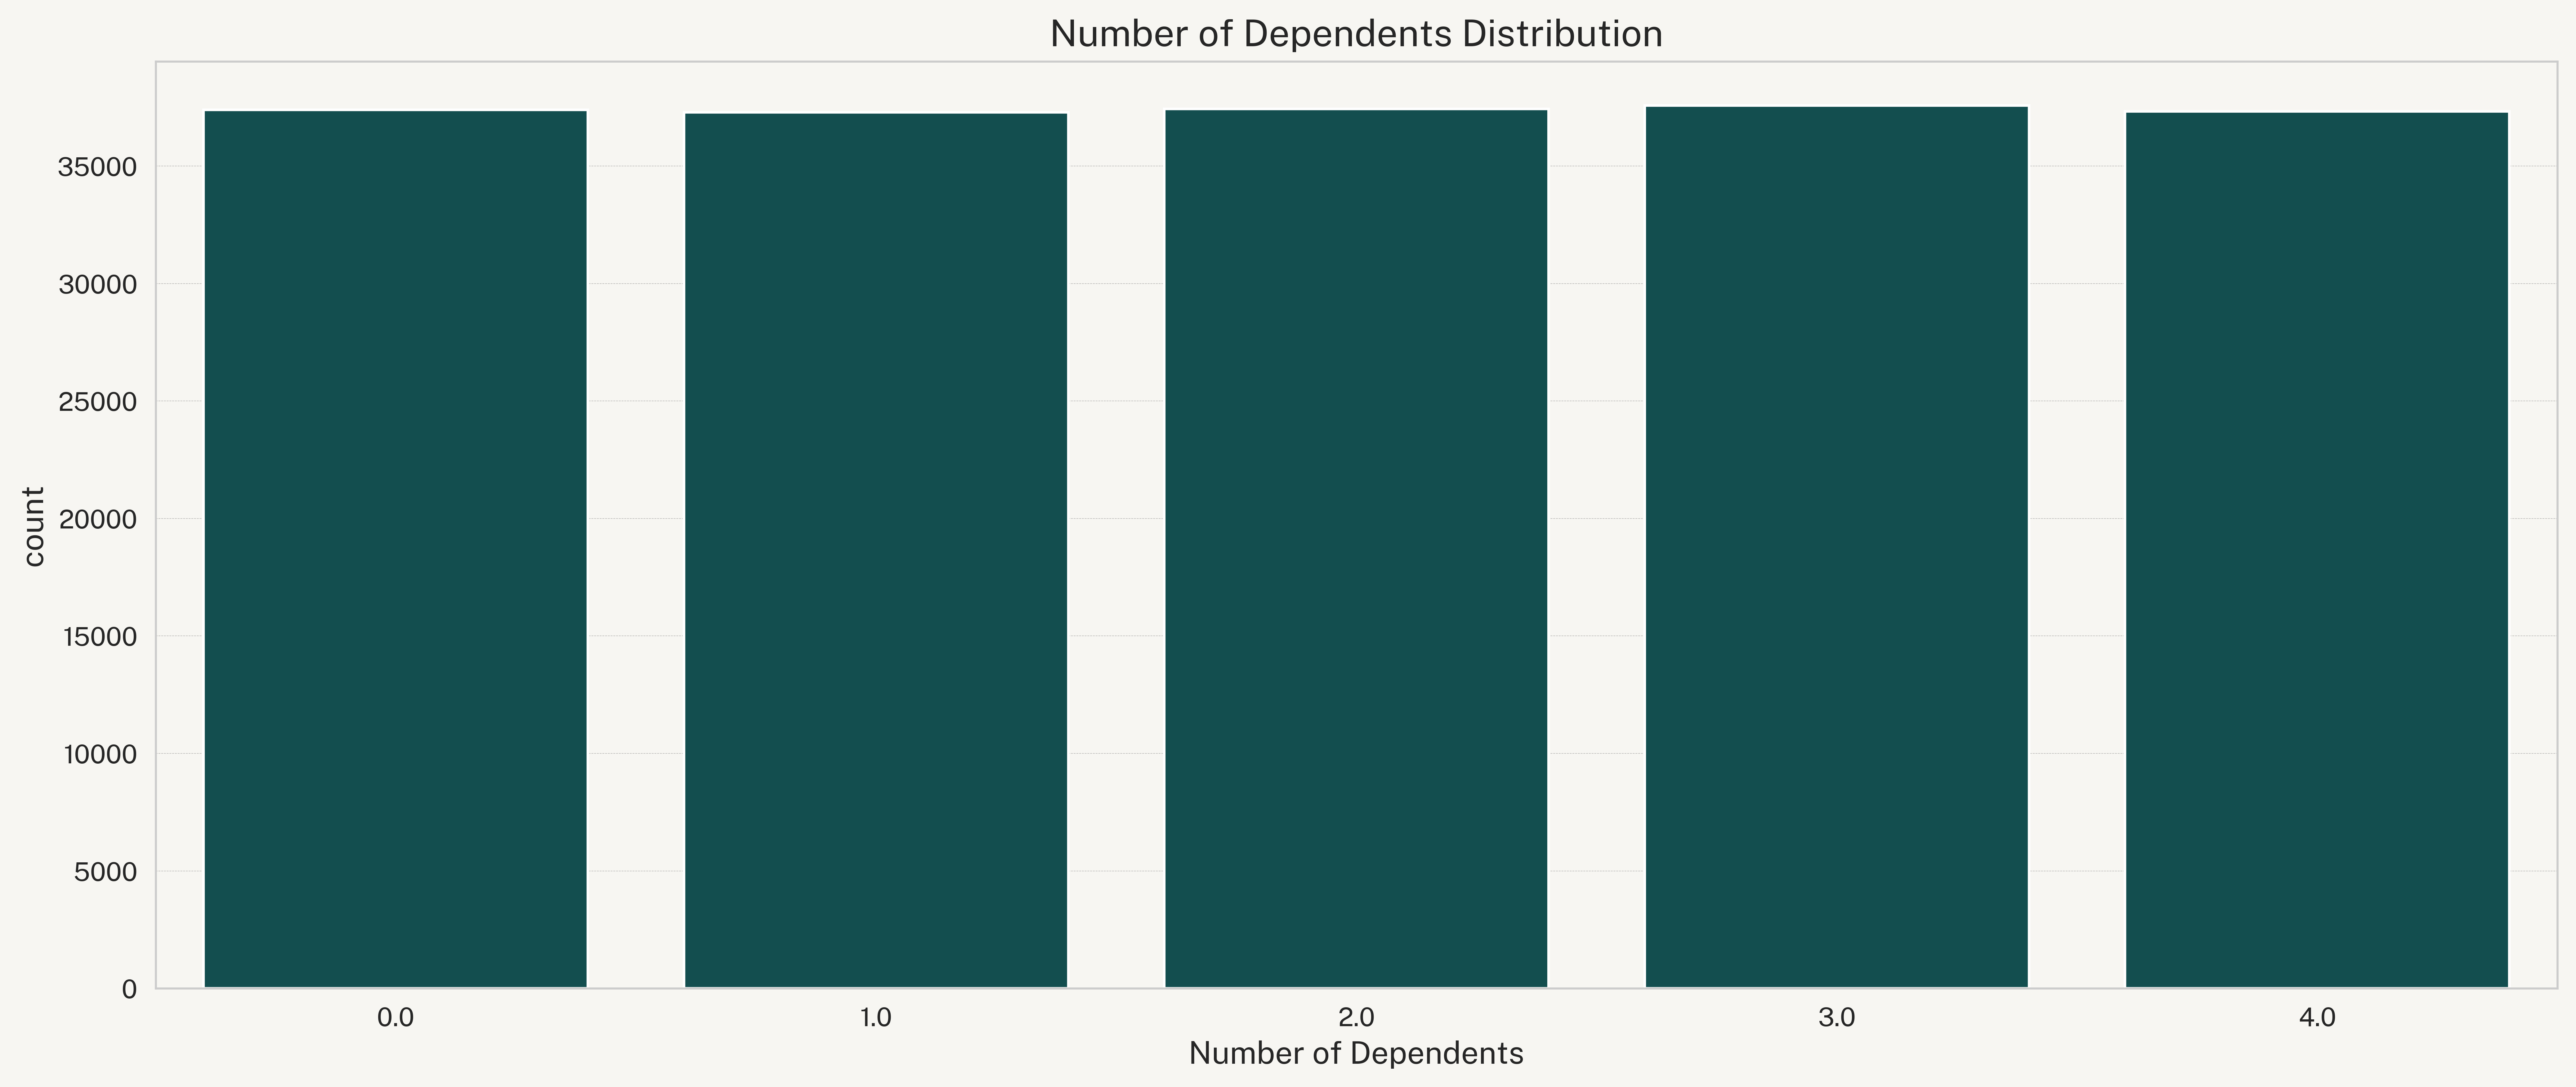

In [97]:
sns.countplot(data=insurance_data, x='number_of_dependents')
plt.xlabel('Number of Dependents')
plt.title("Number of Dependents Distribution")
plt.tight_layout()
plt.show()

#### Previous claims

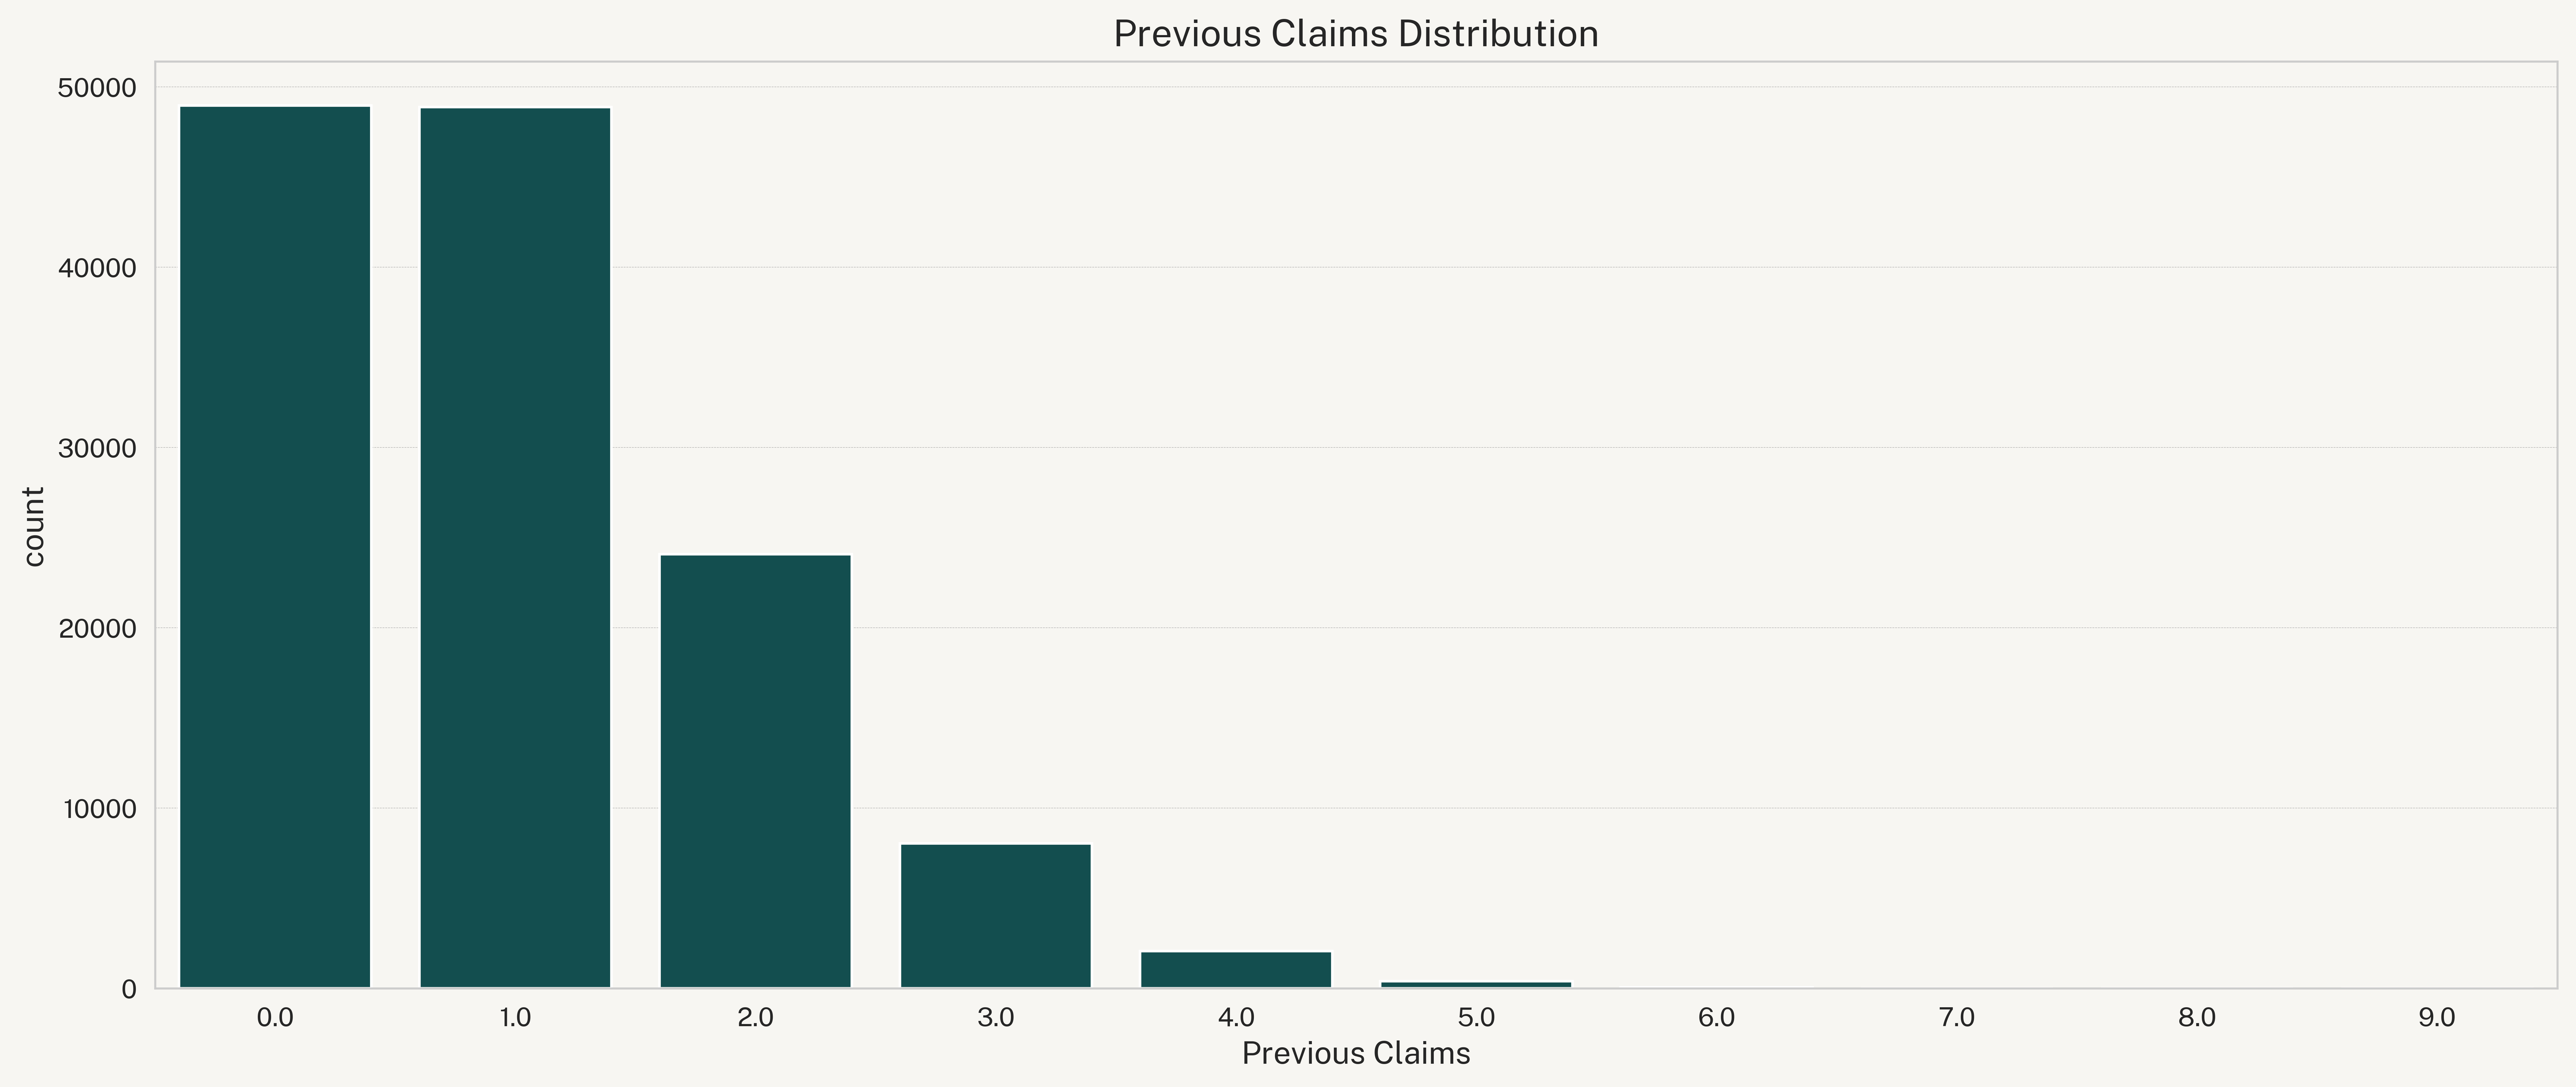

In [98]:
sns.countplot(data=insurance_data, x='previous_claims')
plt.xlabel('Previous Claims')
plt.title("Previous Claims Distribution")
plt.tight_layout()
plt.show()

In [99]:
insurance_data['previous_claims'] = insurance_data['previous_claims'].fillna(insurance_data['previous_claims'].median())

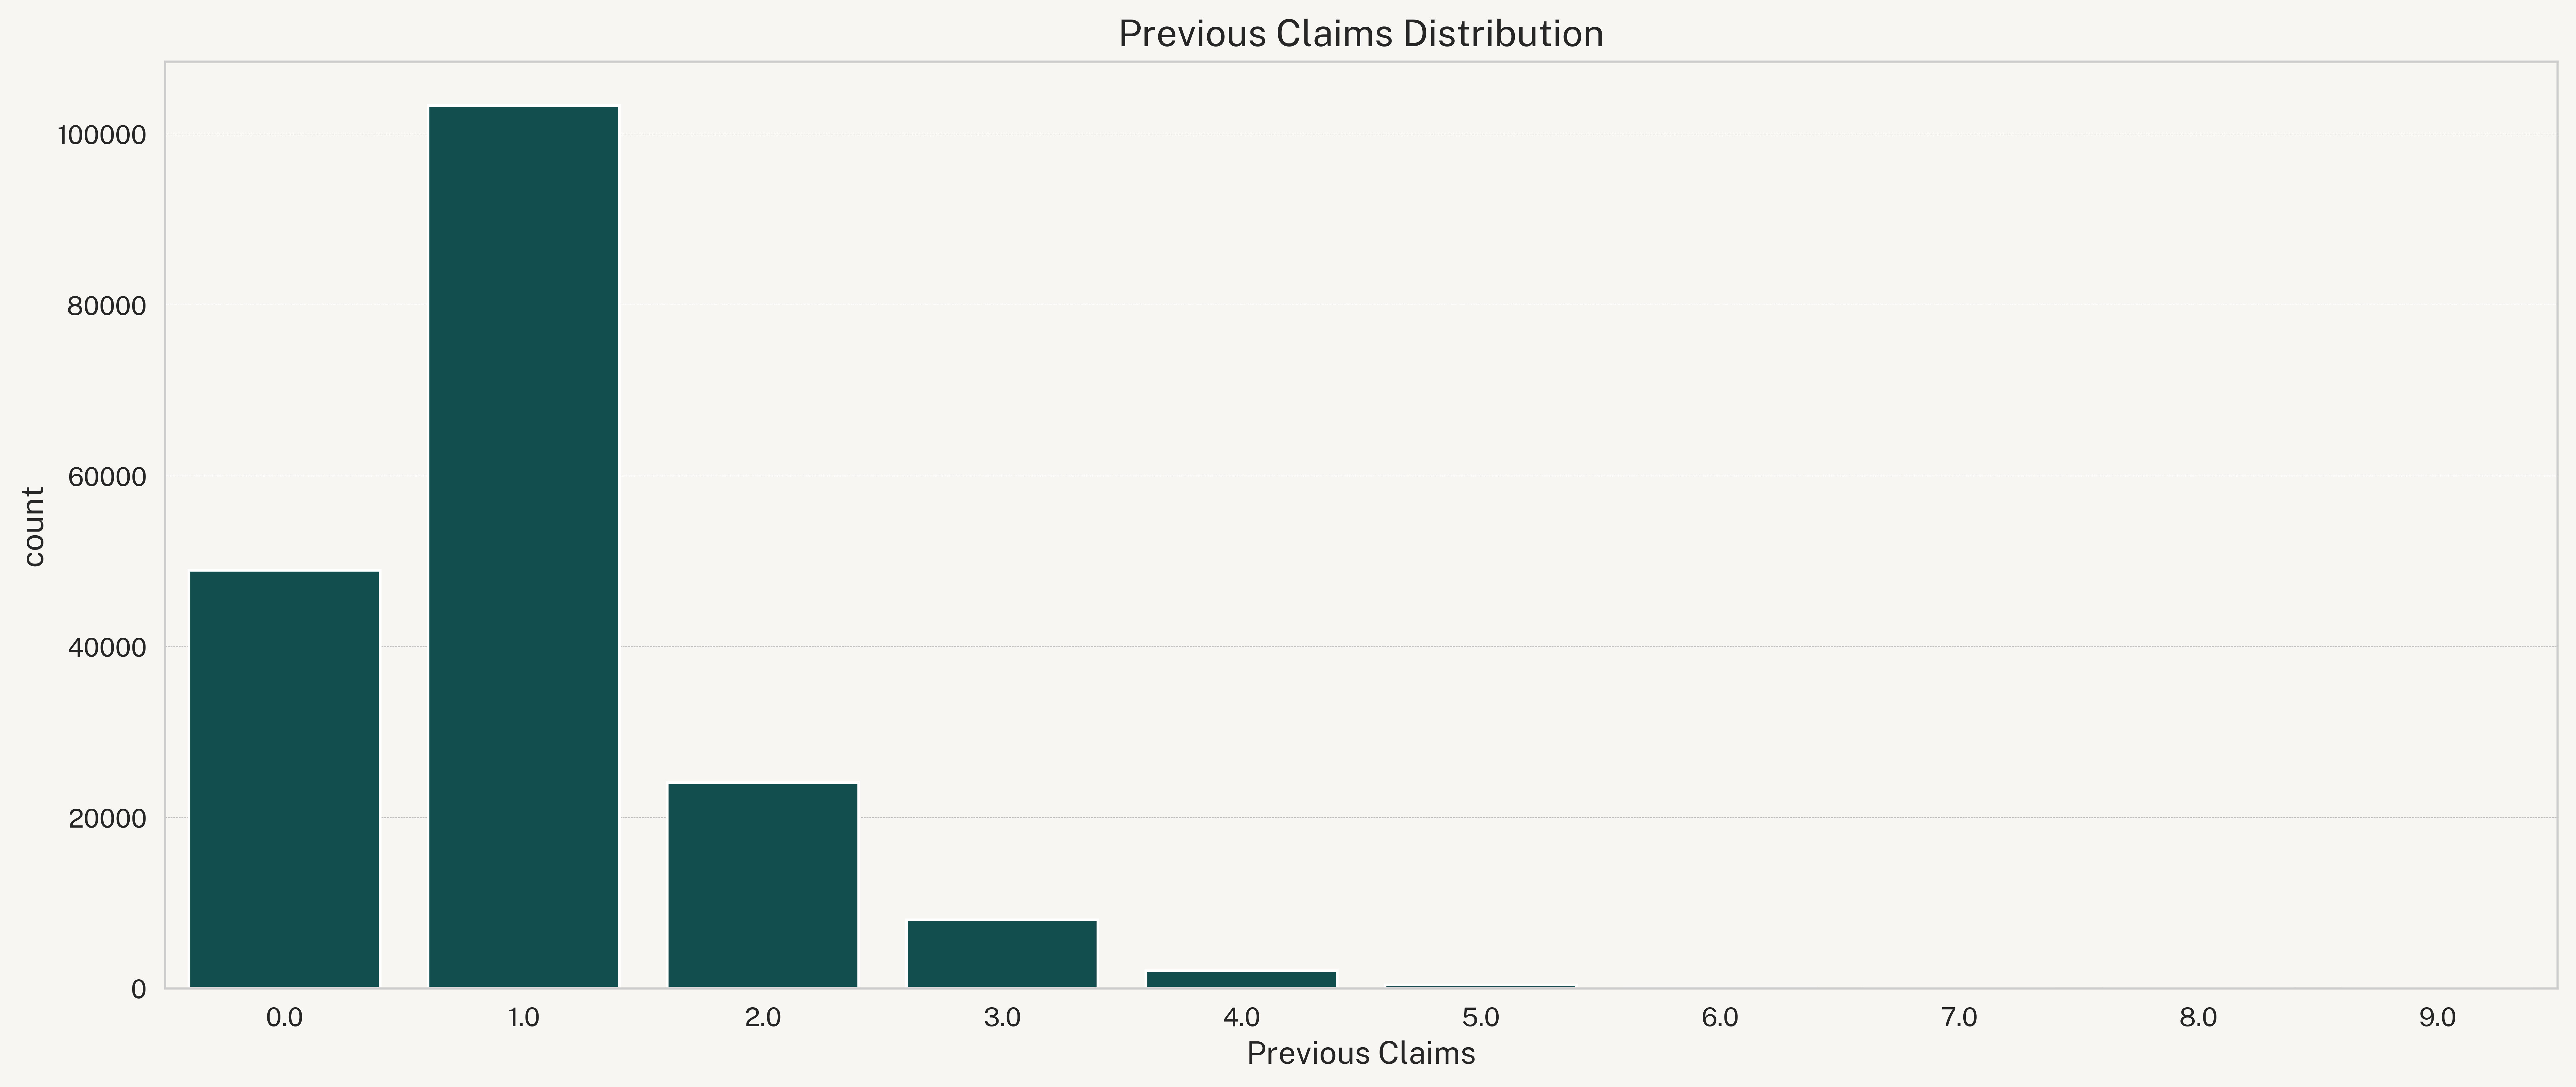

In [100]:
sns.countplot(data=insurance_data, x='previous_claims')
plt.xlabel('Previous Claims')
plt.title("Previous Claims Distribution")
plt.tight_layout()
plt.show()

#### Occupation

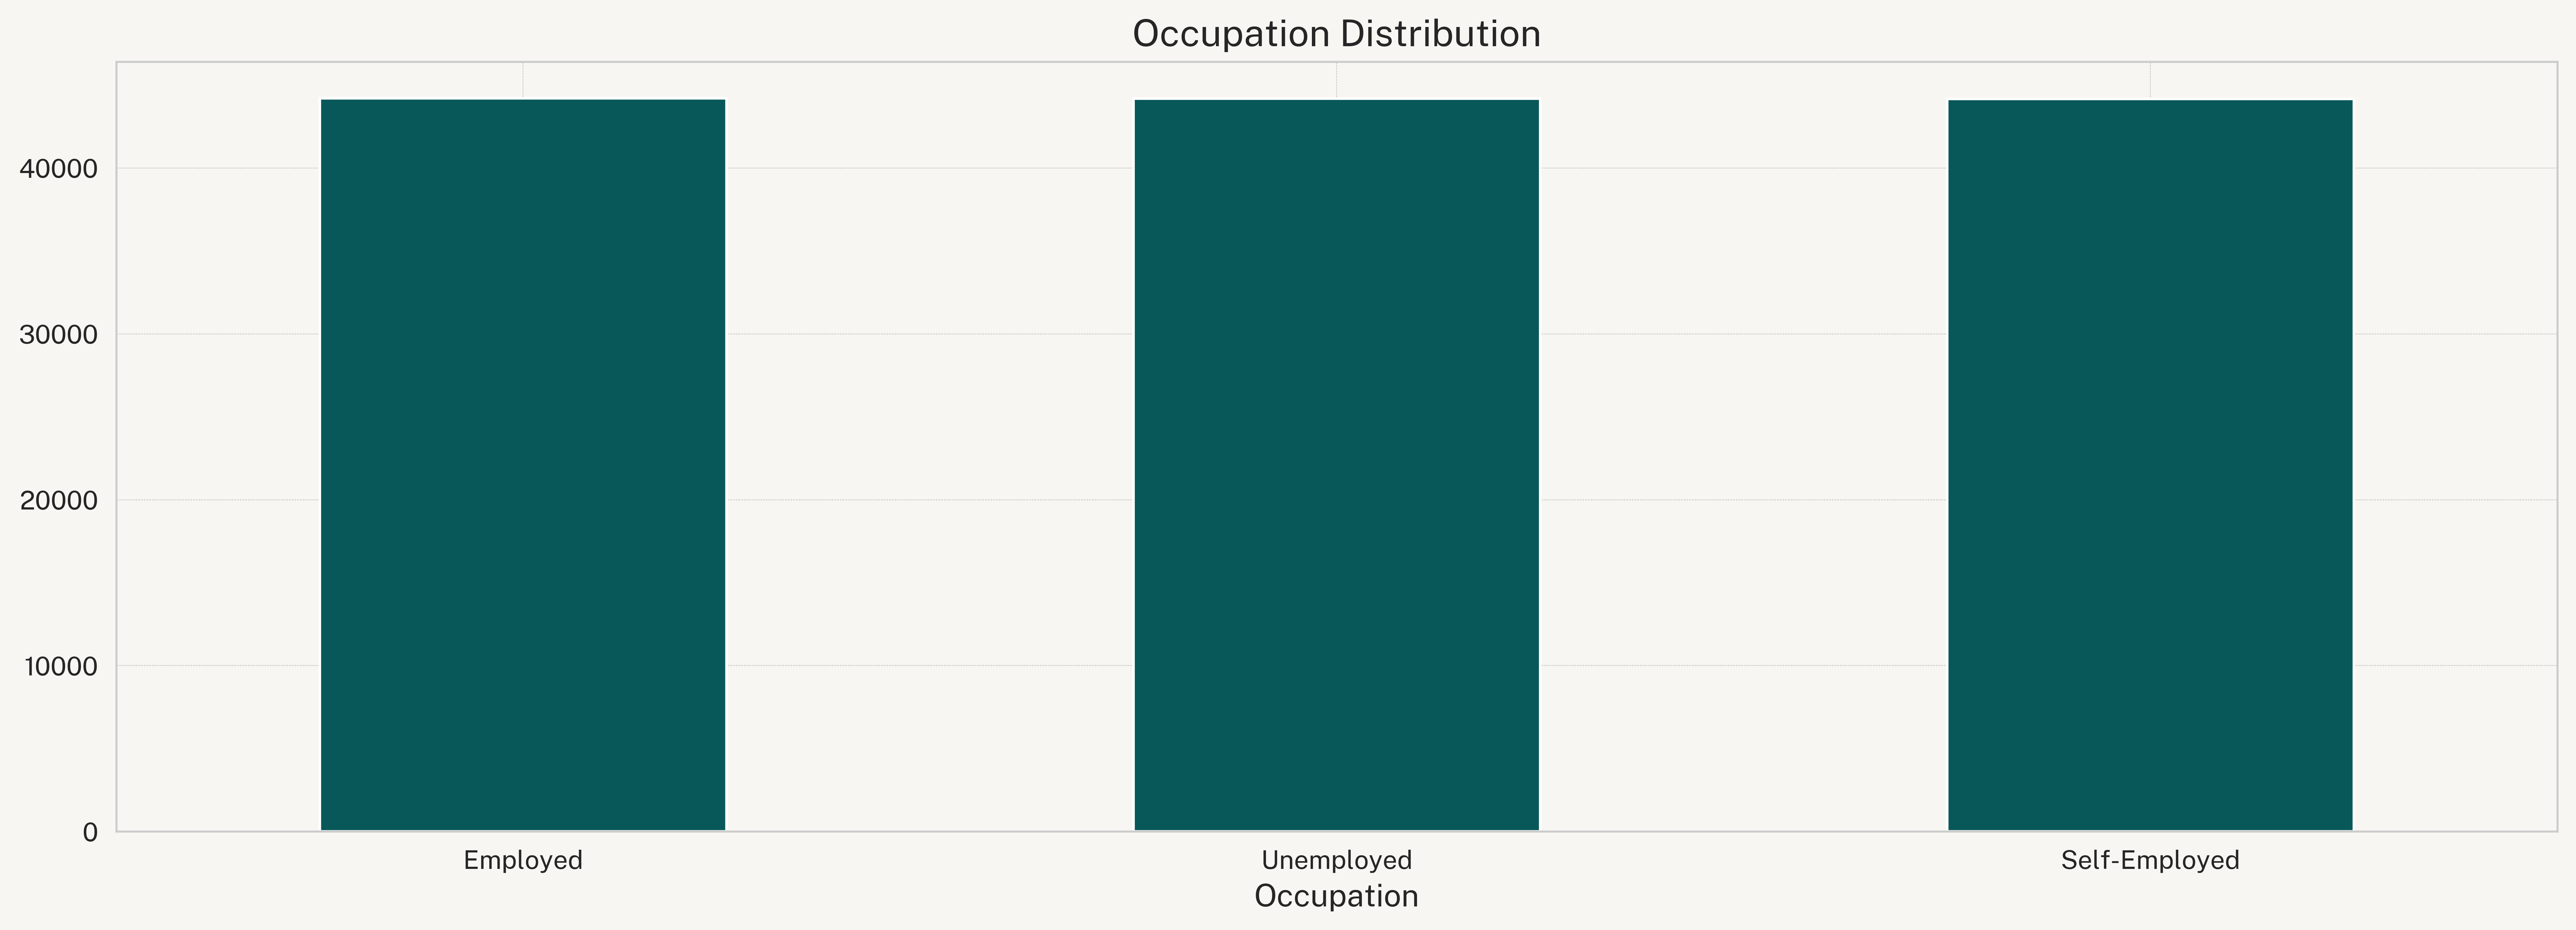

In [101]:
insurance_data['occupation'].value_counts().plot(kind='bar')
plt.xlabel('Occupation')
plt.title("Occupation Distribution")
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

Now that we have interpolated or imputed most of the other missing values, we can apply KNN Imputation to impute this (and other) missing value(s).

In [102]:
insurance_data.isna().sum()

age                         0
gender                      0
annual_income               0
marital_status           3386
number_of_dependents        0
education_level             0
occupation              54436
health_score                0
location                    0
policy_type                 0
previous_claims             0
credit_score                0
insurance_duration          0
premium_amount           1218
smoking_status              0
exercise_frequency          0
dtype: int64

In [106]:
insurance_data.select_dtypes(include='object').columns

Index(['gender', 'marital_status', 'occupation', 'location', 'policy_type',
       'smoking_status', 'exercise_frequency'],
      dtype='object')

In [107]:
insurance_data = pd.concat([insurance_data, pd.get_dummies(insurance_data['occupation'], prefix='occupation')], axis=1)

In [108]:
insurance_data

age  gender  annual_income marital_status  number_of_dependents  \
0       56.0    Male        99990.0        Married                   1.0   
2       32.0  Female        30154.0       Divorced                   3.0   
3       60.0  Female        48371.0       Divorced                   0.0   
4       25.0  Female        54174.0       Divorced                   0.0   
5       38.0    Male        31769.0        Married                   1.0   
...      ...     ...            ...            ...                   ...   
278853  28.0  Female        74931.0        Married                   0.0   
278854  63.0    Male        34311.0       Divorced                   0.0   
278855  53.0    Male        22594.0       Divorced                   4.0   
278856  19.0  Female        32191.0       Divorced                   4.0   
278859  50.0  Female        66056.0       Divorced                   1.0   

        education_level     occupation  health_score  location    policy_type  \
0                     2            NaN     31.074627     Urban  Comprehensive   
2                     1            NaN     14.714909  Suburban  Comprehensive   
3                     3  Self-Employed     25.346926     Rural  Comprehensive   
4                     0  Self-Employed      6.659499     Urban  Comprehensive   
5                     1       Employed     14.736611     Rural  Comprehensive   
...                 ...            ...           ...       ...            ...   
278853                3     Unemployed     25.658908     Urban          Basic   
278854                2       Employed     28.778124     Urban        Premium   
278855                2            NaN     24.455533  Suburban        Premium   
278856                2     Unemployed     25.239104  Suburban          Basic   
278859                3     Unemployed     25.962097     Rural        Premium   

        previous_claims  credit_score  insurance_duration  premium_amount  \
0                   1.0         320.0                   5           308.0   
2                   2.0         652.0                   8           849.0   
3                   1.0         330.0                   7           927.0   
4                   1.0         330.0                   8           303.0   
5                   1.0         521.0                   7          4016.0   
...                 ...           ...                 ...             ...   
278853              2.0         436.0                   5           799.0   
278854              1.0         345.0                   7           466.0   
278855              2.0         500.0                   8           367.0   
278856              1.0         558.0                   3          3044.0   
278859              1.0         797.0                   9          1240.0   

       smoking_status exercise_frequency  occupation_Employed  \
0                 Yes              Daily                False   
2                  No            Monthly                False   
3                  No             Rarely                False   
4                  No             Rarely                False   
5                 Yes              Daily                 True   
...               ...                ...                  ...   
278853            Yes             Rarely                False   
278854             No            Monthly                 True   
278855            Yes              Daily                False   
278856            Yes            Monthly                False   
278859             No              Daily                False   

        occupation_Self-Employed  occupation_Unemployed  
0                          False                  False  
2                          False                  False  
3                           True                  False  
4                           True                  False  
5                          False                  False  
...                          ...                    ...  
278853     

In [112]:
insurance_data.columns = insurance_data.columns.map(lambda x: x.lower().replace(' ', '_').replace('-', '_'))

In [113]:
insurance_data.columns

Index(['age', 'gender', 'annual_income', 'marital_status',
       'number_of_dependents', 'education_level', 'occupation', 'health_score',
       'location', 'policy_type', 'previous_claims', 'credit_score',
       'insurance_duration', 'premium_amount', 'smoking_status',
       'exercise_frequency', 'occupation_employed', 'occupation_self_employed',
       'occupation_unemployed'],
      dtype='object')

In [114]:
insurance_data.drop('occupation', axis=1, inplace=True)

In [115]:
insurance_data.policy_type.value_counts()

policy_type
Premium          62638
Basic            62481
Comprehensive    61873
Name: count, dtype: int64

In [116]:
insurance_data['policy_type'] = insurance_data['policy_type'].map({'Basic': 0, 'Comprehensive': 1, 'Premium': 2})

In [117]:
insurance_data['policy_type'].value_counts()

policy_type
2    62638
0    62481
1    61873
Name: count, dtype: int64

In [118]:
insurance_data.select_dtypes(include='object').columns

Index(['gender', 'marital_status', 'location', 'smoking_status',
       'exercise_frequency'],
      dtype='object')

In [119]:
insurance_data['gender'].value_counts()

gender
Male      93836
Female    93156
Name: count, dtype: int64

In [120]:
insurance_data['gender'] = insurance_data['gender'].map({ 'Male': 0, 'Female': 1})

In [121]:
insurance_data['marital_status'].value_counts()

marital_status
Single      61394
Married     61165
Divorced    61047
Name: count, dtype: int64

In [124]:
insurance_data['marital_status'] = insurance_data['marital_status'].map({'Single': 0, 'Married': 1, 'Divorced': 2})

In [125]:
insurance_data['location'].value_counts()

location
Suburban    62762
Rural       62221
Urban       62009
Name: count, dtype: int64

In [126]:
insurance_data['location'] = insurance_data['location'].map({'Urban': 2, 'Rural': 0, 'Suburban': 1})

In [127]:
insurance_data['smoking_status'].value_counts()

smoking_status
Yes    93598
No     93394
Name: count, dtype: int64

In [129]:
insurance_data['smoking_status'] = insurance_data['smoking_status'].map({'Yes': 1, 'No': 0})

In [130]:
insurance_data['exercise_frequency'].value_counts()

exercise_frequency
Weekly     47088
Rarely     46885
Monthly    46599
Daily      46420
Name: count, dtype: int64

In [132]:
insurance_data['exercise_frequency'] = insurance_data['exercise_frequency'].map({'Daily': 4, 'Weekly': 3, 'Rarely': 1, 'Monthly': 2, 'Never': 0})

In [133]:
insurance_data.select_dtypes(include='object').columns

Index([], dtype='object')

Now that all columns are suitably encoded, we can run the knn imputer to impute missing values in each column.

In [135]:
# knn imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
insurance_data_imputed = imputer.fit_transform(insurance_data)

insurance_data_imputed = pd.DataFrame(insurance_data_imputed, columns=insurance_data.columns)

insurance_data_imputed.isna().sum()

age                         0
gender                      0
annual_income               0
marital_status              0
number_of_dependents        0
education_level             0
health_score                0
location                    0
policy_type                 0
previous_claims             0
credit_score                0
insurance_duration          0
premium_amount              0
smoking_status              0
exercise_frequency          0
occupation_employed         0
occupation_self_employed    0
occupation_unemployed       0
dtype: int64

## Exporting the pre-processed dataset

In [139]:
# export to csv

insurance_data_imputed.to_csv('./insurance_data_imputed.csv', index=False)